# Installations

In [ ]:
!sudo apt install samtools
!apt-get install bedtools
!pip install pybedtools
#pybedtools=0.9.1
#samtools=1.13-4
#bedtool=v2.30.0

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
## Run this for 1617-Cell-cycle samples
G0_1617_SE = '/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_5_1617_cell_cycle_sorted-increased/G0_1617_SE_02_sorted.bam'
G1_1617_SE = '/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_5_1617_cell_cycle_sorted-increased/G1_1617_SE_03_sorted.bam'
S_1617_SE = '/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_5_1617_cell_cycle_sorted-increased/S_1617_SE_04_sorted.bam'
G2_M_1617_SE = '/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_5_1617_cell_cycle_sorted-increased/G2_M_1617_SE_05_sorted.bam'
HPC_1617_SE = '/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_5_1617_cell_cycle_sorted-increased/HPC_1617_SE_07_sorted.bam'
HSC_1617_SE = '/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_5_1617_cell_cycle_sorted-increased/HSC_1617_SE_06_sorted.bam'
Mock_1617_SE ='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_5_1617_cell_cycle_sorted-increased/Mock_01_sorted.bam'

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

BAM_SAMPLES = [G0_1617_SE,
               G1_1617_SE,
               S_1617_SE,
               G2_M_1617_SE,
               HPC_1617_SE,
               HSC_1617_SE,
               Mock_1617_SE]

BAM_NAMES = 'G0_1617_SE G1_1617_SE S_1617_SE G2_M_1617_SE HPC_1617_SE HSC_1617_SE Mock_1617_SE'.split(' ')


Run this for 1617-1450 BM samples

In [ ]:
# #1617-1450-BM samples
# Input_1_SCD_6_24h_Mock='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/1_SCD-6_24h_Mock_Input_01_sorted.bam'
# Input_2_SCD_2_0h_1617_1450='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/2_SCD-2_0h_1617-1450_Input_02_sorted.bam'
# Input_3_SCD_5_24h_1617_1450='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/3_SCD-5_24h_1617-1450_Input_03_sorted.bam'

# BM_4_160_1_0h_Mock='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/4_160-1_0h_Mock_BM_04_sorted.bam'
# BM_5_159_2_0h_1617_1450='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/5_159-2_0h_1617-1450_BM_05_sorted.bam'
# BM_6_159_3_0h_1617_1450='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/6_159-3_0h_1617-1450_BM_06_sorted.bam'

# BM_7_161_3_24h_Mock='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/7_161-3_24h_Mock_BM_07_sorted.bam'
# BM_8_160_5_24h_1617_1450='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/8_160-5_24h_1617-1450_BM_08_sorted.bam'
# BM_9_161_1_24h_1617_1450='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/9_161-1_24h_1617-1450_BM_09_sorted.bam'
# BM_10_161_2_24h_1617_1450='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_4_1617-1450-BM-increased/10_161-2_24h_1617-1450_BM_10_sorted.bam'

In [ ]:
# import pandas as pd
# import re
# import matplotlib.pyplot as plt

# BAM_SAMPLES = [Input_1_SCD_6_24h_Mock,
#     Input_2_SCD_2_0h_1617_1450,
#     Input_3_SCD_5_24h_1617_1450,
#     BM_4_160_1_0h_Mock,
#     BM_5_159_2_0h_1617_1450,
#     BM_6_159_3_0h_1617_1450,
#     BM_7_161_3_24h_Mock,
#     BM_8_160_5_24h_1617_1450,
#     BM_9_161_1_24h_1617_1450,
#     BM_10_161_2_24h_1617_1450]

# BAM_NAMES = 'Input_1_SCD_6_24h_Mock Input_2_SCD_2_0h_1617_1450 Input_3_SCD_5_24h_1617_1450 BM_4_160_1_0h_Mock BM_5_159_2_0h_1617_1450 BM_6_159_3_0h_1617_1450 BM_7_161_3_24h_Mock BM_8_160_5_24h_1617_1450 BM_9_161_1_24h_1617_1450 BM_10_161_2_24h_1617_1450'.split(' ')

In [ ]:
!samtools view  $Input_1_SCD_6_24h_Mock| head -n 5


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Output options:
  -b, --bam                  Output BAM


Run this for 1618-1449 BM samples

In [ ]:
# #1618-1449-BM samples
# Input_1_SCD_6_Mock='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/1_SCD-6_Mock_Input_01_sorted.bam'
# Input_2_SCD_1_0h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/2_SCD-1_0h_1618-1449_Input_02_sorted.bam'
# Input_3_SCD_4_24h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/3_SCD-4_24h_1618-1449_Input_03_sorted.bam'

# BM_4_160_1_0h_Mock='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/4_160-1_0h_Mock_BM_04_sorted.bam'
# BM_5_158_4_0h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/5_158-4_0h_1618-1449_BM_05_sorted.bam'
# BM_6_158_5_0h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/6_158-5_0h_1618-1449_BM_06_sorted.bam'
# BM_7_159_1_0h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/7_159-1_0h_1618-1449_BM_07_sorted.bam'

# BM_8_161_3_24h_Mock='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/8_161-3_24h_Mock_BM_08_sorted.bam'
# BM_9_161_4_24h_Mock='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/9_161-4_24h_Mock_BM_09_sorted.bam'
# BM_10_160_3_24h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/10_160-3_24h_1618-1449_BM_10_sorted.bam'
# BM_11_160_4_24h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/11_160-4_24h_1618-1449_BM_11_sorted.bam'
# BM_12_160_2_24h_1618_1449='/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Long_read_primordium_3_1618-1449-BM-increased/12_160-2_24h_1618-1449_BM_12_sorted.bam'

In [ ]:
# import pandas as pd
# import re
# import matplotlib.pyplot as plt

# BAM_SAMPLES = [Input_1_SCD_6_Mock,
#     Input_2_SCD_1_0h_1618_1449,
#     Input_3_SCD_4_24h_1618_1449,
#     BM_4_160_1_0h_Mock,
#     BM_5_158_4_0h_1618_1449,
#     BM_6_158_5_0h_1618_1449,
#     BM_7_159_1_0h_1618_1449,
#     BM_8_161_3_24h_Mock,
#     BM_9_161_4_24h_Mock,
#     BM_10_160_3_24h_1618_1449,
#     BM_11_160_4_24h_1618_1449,
#     BM_12_160_2_24h_1618_1449]

# BAM_NAMES = 'Input_1_SCD_6_Mock Input_2_SCD_1_0h_1618_1449 Input_3_SCD_4_24h_1618_1449 BM_4_160_1_0h_Mock BM_5_158_4_0h_1618_1449 BM_6_158_5_0h_1618_1449 BM_7_159_1_0h_1618_1449 BM_8_161_3_24h_Mock BM_9_161_4_24h_Mock BM_10_160_3_24h_1618_1449 BM_11_160_4_24h_1618_1449 BM_12_160_2_24h_1618_1449'.split(' ')



Run this for 1617-SE-DE-invitro-samples

In [ ]:
# #0h
# Mock_0h ="/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/0h_Mock_Linear_5980_01_sorted.bam"
# SE_0h= "/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/0h_1617_Linear_5980_02_sorted.bam"
# DE_0h ="/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/0h_1617-1450_Linear_5980_03_sorted.bam"

# #24h
# Mock_24h= "/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/24h_Mock_Linear_5980_04_sorted.bam"
# SE_24h="/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/24h_1617_Linear_5980_05_sorted.bam"
# DE_24h="/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/24h_1617-1450_Linear_5980_06_sorted.bam"

# #48h
# Mock_48h="/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/48h_Mock_Linear_5980_07_sorted.bam"
# SE_48h="/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/48h_1617_Linear_5980_08_sorted.bam"
# DE_48h="/content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/Primordium_increased_reads_bam_files/Bam_files/48h_1617-1450_Linear_5980_09_sorted.bam"

In [ ]:
# import pandas as pd
# import re
# import matplotlib.pyplot as plt

# BAM_SAMPLES = [Mock_0h, SE_0h, DE_0h, Mock_24h, SE_24h, DE_24h, Mock_48h, SE_48h, DE_48h]
# BAM_NAMES = '0h_Mock 0h_SE 0h_DE 24h_Mock 24h_SE 24h_DE 48h_Mock 48h_SE 48h_DE'.split(' ')


In [ ]:
def extract_bed_from_bam(seq_line):
  final_bed = []
  final_with_real_len = []
  #Get start co-ordinate of read from col 4
  initial_postion = int(seq_line[3])

  #Get the Cigar String from col 5 to parse
  seq_line_code = seq_line[5]

  #get read name from col1
  read_name = seq_line[0]

  #get all the alphabets and the preceding numbers and create a continuous coordinate
  # returns a list with chr, start, end, read_name, event type, + strand
  block_name =  [x for x in re.findall('\D', seq_line_code)]
  len_blocks = [int(x) for x in re.findall('\d+', seq_line_code)]

  for t_element, len_element in  zip(block_name, len_blocks):
    original_len = int(len_element)
    if t_element == 'I':
      len_element= 1

    chr = seq_line[2]
    if len(final_bed) == 0:
      start = initial_postion
    else:

      if final_bed[-1][4] != 'I':
        start = final_bed[-1][2]
      else:
        #print (final_bed[-1][4])

        start = final_bed[-2][2]
        #print (start)
        #print (final_bed[-2])
        #print ('end', start + len_element)
        #len_element=1

    end = start + len_element
    bed_event = [chr,start, end, read_name,t_element, '+'] #  #case we want to capture the insertions len we need to modify this by adding a new value representing the event len
    bed_event_with_original = [chr,start, start + original_len , read_name,t_element, '+'] #  #case we want to capture the insertions len we need to modify this by adding a new value representing the event len
    final_bed.append(bed_event)
    final_with_real_len.append(bed_event_with_original)


  return final_bed, final_with_real_len




In [ ]:
# putting all 13 categories to print in a list
categories_to_print = ['double_editing_start_cut_1450_end_cut_1617',
 'cut_start_1450_edit_ending_after_1617',
 'cut_start_1450_edit_ending_before_1617',
 'cut_end_1617_edit_ending_after_1450',
 'cut_end_1617_edit_ending_before_1450',
 'starting_before_1450_and_ending_at_1450_cutsite',
 'cut_start_1617_and_ending_after_1617',
 'non_expectede_starts_and_ends_between',
 'non_expectede_editing_start_before_1450_and_end_1617_after',
 'non_expectede_editing_start_before_1450_and_end_1617_before',
 'non_expectede_editing_start_inbetween_cut_sites_and_end_after_1617',
 'non_expectede_editing_starting_before_1450_and_ending_before_1450',
 'non_expectede_editing_starting_after_1617_and_ending_after_1617']


In [ ]:

import pandas as pd
from pybedtools import BedTool
import numpy as np


def process_bams_double_editing(START_CLIP, END_CLIP, DISTANCE_FROM_START_AND_END, REMOVE_START_END_SAME_LEN, CUT_SITE_1, CUT_SITE_2, bed_guide_1617, bed_guide_1450, EVENT_WINDOW, REGION_LEN , TYPE_OF_EVENT ,DEBUG):

  capturing_category_to_plot = []
  capturing_category_to_plot_small = []
  dict_df_all_samples= {}
  dict_df_number_of_reads_samples= {}

  denominator_to_normalize = {}
  denominator_event_to_normalize = {}
  for bam_in, bam_name in zip(BAM_SAMPLES, BAM_NAMES):
    print (dict_df_number_of_reads_samples)
    !samtools view  $bam_in > bam_writing.txt
    df = pd.DataFrame([x.split('\t') for x in open('bam_writing.txt', 'r').readlines()])

    all_dfs_list = []
    all_dfs_list_real_lens = []

    print (bam_name)
    for read_in in df.values:
      read_in = read_in.tolist()
      #calling extract_bed_from_bam function
      result, result_real_len = extract_bed_from_bam(read_in)
      all_dfs_list.append(pd.DataFrame(result))
      all_dfs_list_real_lens.append(pd.DataFrame(result_real_len))




    df_to_bed_to_filter = pd.concat(all_dfs_list)
    df_to_bed_to_filter_original = pd.concat(all_dfs_list_real_lens)

    df_to_bed_to_filter_original.to_csv(f'{bam_name}_to_capture_insertions_real_len.bed', index=None, sep='\t')

    READ_LEN = 0
    recreating_after_filtering = []
    print('number of reads before filtering', df_to_bed_to_filter.groupby(3).count().shape[0])
    total_reads_number = df_to_bed_to_filter.groupby(3).count().shape[0]



    for f_n, f in df_to_bed_to_filter.groupby(3):
    #removing non-alignment with the extremities  START_CLIP/END_CLIP to the distance DISTANCE_FROM_START_AND_END
      if f.values[0][-2] in {'H', 'S', 'M'} and f.values[-1][-2] in {'H', 'S', 'M'}: #check if the start and end are H,S,M
        start_distance = np.abs(f.values[0] [1] - START_CLIP)
        end_distance =   np.abs(f.values[-1][2] - END_CLIP)
        if start_distance <= DISTANCE_FROM_START_AND_END and end_distance <= DISTANCE_FROM_START_AND_END:
          f['f_len'] = f[2] - f[1]
          if f['f_len'].sum() > READ_LEN:
            del f['f_len']
            recreating_after_filtering.append(f)




    df_to_bed = pd.concat(recreating_after_filtering) #bed after remove reads with less than READ_LEN nt


    df_grep_reads = pd.DataFrame(df_to_bed[3].unique().tolist(), columns=['unique_reads'])
    df_grep_reads.to_csv(f'{bam_name}_filtered_reads.txt', header=None, sep='\t', index=None)
    total_reads_overlaping_extremities = df_to_bed.groupby(3).count().shape[0]
    denominator_to_normalize[bam_name] = total_reads_overlaping_extremities
    print('overlaping with extremities: ', total_reads_overlaping_extremities)
    dict_df_number_of_reads_samples[bam_name] = total_reads_overlaping_extremities
    dict_values_len= {f'{end-1}_{end}_{name}' : end-start for start, end, name in df_to_bed[[1,2,3]].values }

    bed_seqs = BedTool.from_dataframe(df_to_bed)




    df_bed_just_end = bed_seqs.to_dataframe() #using only the end of the deletion
    df_bed_just_end['start'] = df_bed_just_end['end'] -1

    df_bed_just_start = bed_seqs.to_dataframe() #using only the start of the deletion
    df_bed_just_start['end'] = df_bed_just_start['start'] +1



    bed_just_start = BedTool.from_dataframe(df_bed_just_start)
    bed_just_end = BedTool.from_dataframe(df_bed_just_end)


    #class: unidirectional +58
    bed_intersection_1450_start = bed_just_start.intersect(bed_guide_1450, loj=True).to_dataframe()#.query(f"score == '{TYPE_OF_EVENT}' ").copy()
    bed_intersection_1450_end = bed_just_end.intersect(bed_guide_1450, loj=True).to_dataframe()#.query(f"score == '{TYPE_OF_EVENT}' ").copy()

    #class : unidirectional +55
    bed_intersection_1617_start = bed_just_start.intersect(bed_guide_1617,   loj=True).to_dataframe()#.query(f"score == '{TYPE_OF_EVENT}' ").copy()
    bed_intersection_1617_end = bed_just_end.intersect(bed_guide_1617,   loj=True).to_dataframe()#.query(f"score == '{TYPE_OF_EVENT}' ").copy()

    df_all_info = bed_seqs.to_dataframe()
    df_all_info.head()

    df_all_info['id_start'] =           df_all_info.apply(lambda x : f"{x['name']}_{x['start']}", axis=1).values
    df_all_info['id_end'] =             df_all_info.apply(lambda x : f"{x['name']}_{x['end']}", axis=1).values

    # set_1450 starting
    bed_intersection_1450_start['id_start'] = bed_intersection_1450_start.apply(lambda x : f"{x['name']}_{x['start']}", axis=1).values
    filtered_bed_intersection_1450_start = bed_intersection_1450_start.query('itemRgb != -1').copy()
    set_1450_start = set(filtered_bed_intersection_1450_start['id_start'].values)
    df_all_info['starting_on_1450'] = df_all_info['id_start'].apply( lambda x: x in set_1450_start)

    # set_1450 ending

    bed_intersection_1450_end['id_end'] = bed_intersection_1450_end.apply(lambda x : f"{x['name']}_{x['end']}", axis=1).values
    filtered_bed_intersection_1450_end = bed_intersection_1450_end.query('itemRgb != -1').copy()
    set_1450_end = set(filtered_bed_intersection_1450_end['id_end'].values)
    df_all_info['ending_on_1450'] = df_all_info['id_end'].apply( lambda x: x in set_1450_end)

    # set_1617 starting
    bed_intersection_1617_start['id_start'] = bed_intersection_1617_start.apply(lambda x : f"{x['name']}_{x['end']}", axis=1).values
    filtered_bed_intersection_1617_start = bed_intersection_1617_start.query('itemRgb != -1').copy()
    set_1617_start = set(filtered_bed_intersection_1617_start['id_start'].values)
    df_all_info['starting_on_1617'] = df_all_info['id_start'].apply( lambda x: x in set_1617_start)

    # set_1617 ending
    bed_intersection_1617_end['id_end'] = bed_intersection_1617_end.apply(lambda x : f"{x['name']}_{x['end']}", axis=1).values
    filtered_bed_intersection_1617_end = bed_intersection_1617_end.query('itemRgb != -1').copy()
    set_1617_end = set(filtered_bed_intersection_1617_end['id_end'].values)
    df_all_info['ending_on_1617'] = df_all_info['id_end'].apply( lambda x: x in set_1617_end)

    #creating flag with not intersecting
    df_all_info['not_intersecting_cut_sites'] = df_all_info['starting_on_1450 ending_on_1450 starting_on_1617 ending_on_1617'.split(' ')].apply(lambda x : set(x) == {False}, axis=1)

    #print(df_all_info.groupby(['ending_on_1450', 'ending_on_1617'] ).count())

    #class: if it ends in 58 and ends in 55 it is a double editing  == 3.1
    #create the intersection between them
    df_all_info['double_editing_start_cut_1450_end_cut_1617'] = df_all_info.apply(lambda x :  x['starting_on_1450'] == True and  x['ending_on_1617'] == True  , axis=1)

    #class: bed_intersection_1450 + > 1617 site(> 25)
    df_all_info['cut_start_1450_edit_ending_after_1617'] = df_all_info.apply(lambda x :  x['starting_on_1450'] == True and  x['ending_on_1617'] == False  and x['starting_on_1617'] == False and  x['end'] >   (CUT_SITE_2 + EVENT_WINDOW) , axis=1)
    df_all_info['cut_start_1450_edit_ending_before_1617'] = df_all_info.apply(lambda x :  x['starting_on_1450'] == True and  x['ending_on_1617'] == False and x['starting_on_1617'] == False and  x['end'] <   (CUT_SITE_2 - EVENT_WINDOW) , axis=1)

    #class: bed_intersection_1617 + <  1450 site(< 25)
    df_all_info['cut_end_1617_edit_ending_after_1450'] =  df_all_info.apply(lambda x :  x['ending_on_1617'] == True   and x['ending_on_1450'] == False and x['starting_on_1450'] == False and     x['start']  >   (CUT_SITE_1 + EVENT_WINDOW) , axis=1)
    df_all_info['cut_end_1617_edit_ending_before_1450'] = df_all_info.apply(lambda x :  x['ending_on_1617'] == True  and x['ending_on_1450'] == False  and x['starting_on_1450'] == False and     x['start']  <   (CUT_SITE_1 - EVENT_WINDOW)  , axis=1)


    df_all_info['starting_before_1450_and_ending_at_1450_cutsite'] = df_all_info.apply(lambda x :  x['start']< (CUT_SITE_1 - EVENT_WINDOW)   and x['ending_on_1450'] == True , axis=1)

    df_all_info['cut_start_1617_and_ending_after_1617'] = df_all_info.apply(lambda x :  x['starting_on_1617']>  True  and x['end'] > (CUT_SITE_2 + EVENT_WINDOW) , axis=1)


    #class not intersecting, overlaping editing but not ending  start <  1450-25 and end > 1617+25

    df_all_info['non_expectede_starts_and_ends_between'] = df_all_info.apply(lambda x :  x['not_intersecting_cut_sites'] == True     and  x['start']  >   CUT_SITE_1 + EVENT_WINDOW  and x['end'] <   (CUT_SITE_2 - EVENT_WINDOW) , axis=1)

    df_all_info['non_expectede_editing_start_before_1450_and_end_1617_after'] = df_all_info.apply(lambda x :  x['not_intersecting_cut_sites'] == True     and  x['start']  <   (CUT_SITE_1 - EVENT_WINDOW)  and x['end'] >   (CUT_SITE_2 + EVENT_WINDOW) , axis=1)

    df_all_info['non_expectede_editing_start_before_1450_and_end_1617_before'] = df_all_info.apply(lambda x :   x['not_intersecting_cut_sites'] == True  and  x['start']  <   (CUT_SITE_1 - EVENT_WINDOW)  and  x['end']  >   (CUT_SITE_1 - EVENT_WINDOW)  and x['end'] <    (CUT_SITE_2 - EVENT_WINDOW) , axis=1)

    df_all_info['non_expectede_editing_start_inbetween_cut_sites_and_end_after_1617'] = df_all_info.apply(lambda x :  x['not_intersecting_cut_sites'] == True and x['start']  >    (CUT_SITE_1 + EVENT_WINDOW) and x['start']  < (CUT_SITE_2 - EVENT_WINDOW) and x['end'] >   (CUT_SITE_2 + EVENT_WINDOW) , axis=1)

    df_all_info['non_expectede_editing_starting_before_1450_and_ending_before_1450'] = df_all_info.apply(lambda x :  x['not_intersecting_cut_sites'] == True and x['start']< (CUT_SITE_1 - EVENT_WINDOW)   and x['end'] < (CUT_SITE_1 - EVENT_WINDOW) , axis=1)

    df_all_info['non_expectede_editing_starting_after_1617_and_ending_after_1617'] = df_all_info.apply(lambda x :  x['not_intersecting_cut_sites'] == True and x['start']> (CUT_SITE_2 + EVENT_WINDOW)   and x['end'] > (CUT_SITE_2 + EVENT_WINDOW) , axis=1)


    df_all_info['region_len'] = df_all_info['end'] -  df_all_info['start']

    #small calculations or starts in 1450 or ends in 1450 (between the 50 space from this site will be automatically captured)
    df_all_info['ending_or_starting_to_small_1450'] = df_all_info.apply(lambda x :  x["starting_on_1450"]  ==  True or x["ending_on_1450"]  ==  True  , axis=1)
    df_all_info['small_on_1450_site'] = df_all_info.apply(lambda x :  x["ending_or_starting_to_small_1450"]  ==  True and  x['region_len'] <= REGION_LEN  , axis=1)

    #small calculations or starts in 1617 or ends in 1617 (between the 50 space from this site will be automatically captured)
    df_all_info['ending_or_starting_to_small_1617'] = df_all_info.apply(lambda x :  x["starting_on_1617"]  ==  True or x["ending_on_1617"]  ==  True  , axis=1)
    df_all_info['small_on_1617_site'] = df_all_info.apply(lambda x :  x["ending_or_starting_to_small_1617"]  ==  True and  x['region_len'] <= REGION_LEN  , axis=1)

    df_all_info['1450_is_between_start_and_end'] = df_all_info.apply(lambda x :     x['start'] < CUT_SITE_1   and  x['end'] > CUT_SITE_1   and x['region_len'] <= REGION_LEN ,axis=1)
    df_all_info['small_crossing_1450_site'] = df_all_info.apply(lambda x :  x["1450_is_between_start_and_end"]  ==  True and x['ending_or_starting_to_small_1450'] == False and x['region_len'] <= REGION_LEN  , axis=1)

    df_all_info['1617_is_between_start_and_end'] = df_all_info.apply(lambda x :      x['start'] < CUT_SITE_2   and  x['end'] > CUT_SITE_2  and x['region_len'] <= REGION_LEN ,axis=1)
    df_all_info['small_crossing_1617_site'] = df_all_info.apply(lambda x :  x["1617_is_between_start_and_end"]  ==  True and   x['ending_or_starting_to_small_1617'] == False and x['region_len'] <= REGION_LEN  , axis=1)

    #filtering out reads with the same start and end point to keep only unique break-point reads
    if REMOVE_START_END_SAME_LEN:
      df_all_info = df_all_info.drop_duplicates(['start', 'end'])

    denominator_event_to_normalize[bam_name] = df_all_info.query(f'region_len > {REGION_LEN}').shape[0]
    #if REMOVE_START_END_SAME_LEN:
      #original_length = len(df_all_info)
      #df_all_info = df_all_info.drop_duplicates(['start', 'end'])
      #remaining_length = len(df_all_info)
      #print(f"Original number of reads: {original_length}")
      #print(f"Number of reads after removing duplicates: {remaining_length}")
      #print(df_all_info)

    #longer than 25 on sites
    number_cat = []
    for cat in categories_to_print :
      k = cat
      df_v = df_all_info.query(f'score == "{TYPE_OF_EVENT}" and region_len > {REGION_LEN} and {k}==True')
      number_cat.append(df_v.shape[0])
      #print (number_cat)
      #print (number_cat.columns)

    df_numbers = pd.DataFrame(number_cat).T
    df_numbers.columns = categories_to_print
    capturing_category_to_plot.append(df_numbers)

    #shorter than 25 on sites
    number_cat_small = []

    for cat in categories_to_print + ['small_on_1450_site', 'small_on_1617_site' , 'small_crossing_1450_site', 'small_crossing_1617_site'] :
      k = cat
      df_v = df_all_info.query(f'score == "{TYPE_OF_EVENT}" and region_len <= {REGION_LEN} and {k}==True')
      number_cat_small.append(df_v.shape[0])

    df_numbers_small = pd.DataFrame(number_cat_small ).T
    df_numbers_small.columns = categories_to_print + ['small_on_1450_site', 'small_on_1617_site','small_crossing_1450_site', 'small_crossing_1617_site']
    capturing_category_to_plot_small.append(df_numbers_small)


    dict_df_all_samples[bam_name] = df_all_info



    if DEBUG:
      # if 'DE' in bam_name:
      #   print ('This is a debug run')
      return df_all_info


  return  capturing_category_to_plot, capturing_category_to_plot_small, denominator_to_normalize , denominator_event_to_normalize , dict_df_all_samples, dict_df_number_of_reads_samples

#For 1618-1449 samples
# START_CLIP = 53395
# END_CLIP =   59374
# DISTANCE_FROM_START_AND_END = 100
# REMOVE_START_END_SAME_LEN = True # keep the unique
# CUT_SITE_1 = 55281 # 1449-cut site
# CUT_SITE_2 = 58395 # 1618-cut-site
# EVENT_WINDOW = 100
# REGION_LEN = 25 #short regions <=25 longer >25
# TYPE_OF_EVENT= "D" # "I"

#For 1617-1450 samples
START_CLIP = 53395
END_CLIP =   59374
DISTANCE_FROM_START_AND_END = 100
REMOVE_START_END_SAME_LEN = True # keep the unique
CUT_SITE_1 = 55282 # 1450-cut site
CUT_SITE_2 = 58389 # 1617-cut-site
EVENT_WINDOW = 100
REGION_LEN = 25 #short regions <=25 long >25
TYPE_OF_EVENT= "D" # "I"


CAPTURE_INSERTIONS= True
#create a pybedtools object to the 1617 editing site


bed_guide_1450 = BedTool.from_dataframe(pd.DataFrame([['BCL11A',
                                                      CUT_SITE_1-EVENT_WINDOW,
                                                      CUT_SITE_1+EVENT_WINDOW,
                                                      'guide_1450_unidirectional'

                                                      ]]))

bed_guide_1617 = BedTool.from_dataframe(pd.DataFrame([['BCL11A',
                                                    CUT_SITE_2-EVENT_WINDOW,
                                                    CUT_SITE_2+EVENT_WINDOW,
                                                    'guide_1617_unidirectional'
                                                    ]]))
DEBUG=False

capturing_category_to_plot, capturing_category_to_plot_small, denominator_to_normalize, denominator_event_to_normalize, captured_dict_df_all_samples, total_dict_number_of_reads_samples  = process_bams_double_editing(START_CLIP, END_CLIP, DISTANCE_FROM_START_AND_END, REMOVE_START_END_SAME_LEN, CUT_SITE_1, CUT_SITE_2, bed_guide_1617, bed_guide_1450, EVENT_WINDOW, REGION_LEN, TYPE_OF_EVENT, DEBUG )

#debug

#df_debug  = process_bams_double_editing(START_CLIP, END_CLIP, DISTANCE_FROM_START_AND_END, REMOVE_START_END_SAME_LEN, CUT_SITE_1, CUT_SITE_2, bed_guide_1617, bed_guide_1450, EVENT_WINDOW, REGION_LEN, TYPE_OF_EVENT, DEBUG)


{}
G0_1617_SE
number of reads before filtering 9682
overlaping with extremities:  2807
{'G0_1617_SE': 2807}
G1_1617_SE
number of reads before filtering 9760
overlaping with extremities:  3141
{'G0_1617_SE': 2807, 'G1_1617_SE': 3141}
S_1617_SE
number of reads before filtering 9763
overlaping with extremities:  1998
{'G0_1617_SE': 2807, 'G1_1617_SE': 3141, 'S_1617_SE': 1998}
G2_M_1617_SE
number of reads before filtering 9630
overlaping with extremities:  3091
{'G0_1617_SE': 2807, 'G1_1617_SE': 3141, 'S_1617_SE': 1998, 'G2_M_1617_SE': 3091}
HPC_1617_SE
number of reads before filtering 9179
overlaping with extremities:  2634
{'G0_1617_SE': 2807, 'G1_1617_SE': 3141, 'S_1617_SE': 1998, 'G2_M_1617_SE': 3091, 'HPC_1617_SE': 2634}
HSC_1617_SE
number of reads before filtering 9403
overlaping with extremities:  2741
{'G0_1617_SE': 2807, 'G1_1617_SE': 3141, 'S_1617_SE': 1998, 'G2_M_1617_SE': 3091, 'HPC_1617_SE': 2634, 'HSC_1617_SE': 2741}
Mock_1617_SE
number of reads before filtering 9060
overlapi

In [ ]:
import numpy as np

# Your function definition here
def add_new_bar(start, end, category):
    bed_v = np.array([0] * 6000)
    bed_v[start:end] = category
    return bed_v.tolist()

# Example usage
start_index = 100
end_index = 200
category_number = 2
result = add_new_bar(start_index, end_index, category_number)

# Check if the values are assigned correctly
print(result[95:205])  # Print a range around the modified area to check


[0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0]


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


def check_name(x_sample, remove_this_effect = False):
  if '_SE' in x_sample and not remove_this_effect:
    return  ['Unidirectional_wrt_1617',
                    'Bidirectional_wrt_1617',
                    'Bidirectional_wrt_both_sites']
  else:
    return ['Unidirectional_wrt_1450',
                    'Unidirectional_wrt_1617',
                    'Bidirectional_wrt_1450',
                    'Bidirectional_wrt_1617',
                    'Bidirectional_wrt_both_sites']


def using_cat_data(cat_in):
  df_all_concat_cat = pd.concat(cat_in)
  df_all_concat_cat.index = BAM_NAMES
  df_all_concat_cat['sample'] = BAM_NAMES
  df_melted_to_plot = df_all_concat_cat.melt('sample')

  #put here your modifications
  #  df_all_ploting['Unidirectional_wrt_1450'] = df_all_ploting[['cut_start_1450_edit_ending_after_1617', 'cut_start_1450_edit_ending_before_1617','starting_before_1450_and_ending_at_1450_cutsite']].sum(1).apply(bool).values

  df_all_concat_cat['Unidirectional_wrt_1450'] = df_all_concat_cat[['cut_start_1450_edit_ending_after_1617', 'cut_start_1450_edit_ending_before_1617','starting_before_1450_and_ending_at_1450_cutsite']].sum(1).values
  df_all_concat_cat['Unidirectional_wrt_1617'] = df_all_concat_cat[['cut_end_1617_edit_ending_after_1450', 'cut_end_1617_edit_ending_before_1450', 'cut_start_1617_and_ending_after_1617']].sum(1).values
  df_all_concat_cat['Bidirectional_wrt_1450'] = df_all_concat_cat[['non_expectede_editing_start_before_1450_and_end_1617_before']].sum(1).values
  df_all_concat_cat['Bidirectional_wrt_1617'] = df_all_concat_cat[['non_expectede_editing_start_inbetween_cut_sites_and_end_after_1617']].sum(1).values
  df_all_concat_cat['Bidirectional_wrt_both_sites'] = df_all_concat_cat[['non_expectede_editing_start_before_1450_and_end_1617_after']].sum(1).values
  df_all_concat_cat['Unedited_deletions'] = df_all_concat_cat[['non_expectede_starts_and_ends_between', 'non_expectede_editing_starting_before_1450_and_ending_before_1450', 'non_expectede_editing_starting_after_1617_and_ending_after_1617']].sum(1).values
  df_all_concat_cat['Programmed_3_1kb'] = df_all_concat_cat[['double_editing_start_cut_1450_end_cut_1617']].sum(1).values

  # Calculate the sum for each sample and create a new column 'Sum_Columns'
  #df_all_concat_cat['Sum_Uni_and_Bidirectional_deletions'] = df_all_concat_cat.groupby('sample')[columns_to_sum].transform('sum').sum(axis=1)
  #df_all_concat_cat.groupby('sample')[columns_to_sum].transform('sum').sum(axis=1)
  df_all_concat_cat['Sum_Uni_and_Bidirectional_deletions'] = df_all_concat_cat.apply(lambda x : x[   check_name(x['sample'])   ].sum() ,axis=1).values
  # Print the DataFrame with the new 'Sum_Columns' column
  print(df_all_concat_cat[['sample', 'Sum_Uni_and_Bidirectional_deletions']])
  #print(df_all_concat_cat[['sample', 'Sum_all_long_deletion_events']])
  print(df_all_concat_cat[['sample', 'Programmed_3_1kb']])

  return df_all_concat_cat
df_all_concat_cat = using_cat_data(capturing_category_to_plot)



                    sample  Sum_Uni_and_Bidirectional_deletions
G0_1617_SE      G0_1617_SE                                  567
G1_1617_SE      G1_1617_SE                                  718
S_1617_SE        S_1617_SE                                  591
G2_M_1617_SE  G2_M_1617_SE                                  769
HPC_1617_SE    HPC_1617_SE                                  561
HSC_1617_SE    HSC_1617_SE                                  456
Mock_1617_SE  Mock_1617_SE                                    1
                    sample  Programmed_3_1kb
G0_1617_SE      G0_1617_SE                 8
G1_1617_SE      G1_1617_SE                18
S_1617_SE        S_1617_SE                20
G2_M_1617_SE  G2_M_1617_SE                16
HPC_1617_SE    HPC_1617_SE                 4
HSC_1617_SE    HSC_1617_SE                 0
Mock_1617_SE  Mock_1617_SE                12


In [ ]:
df_to_normalized = df_all_concat_cat[['sample', 'Sum_Uni_and_Bidirectional_deletions']].copy()



df_to_normalized['read_number'] = df_to_normalized[['sample', 'Sum_Uni_and_Bidirectional_deletions']].apply(lambda x : total_dict_number_of_reads_samples[x['sample']] ,axis=1)


def generate_normalizing_dict(list_of_samples_names):
  df_samples_norm = df_to_normalized.copy()
  minimal_events_name = df_samples_norm['read_number'].sort_values().index[0]
  minimal_events_value = df_samples_norm['read_number'].sort_values().iloc[0]

  df_samples_norm['ratio'] =     total_dict_number_of_reads_samples[minimal_events_name] / df_samples_norm['read_number']
  df_samples_norm['sampling_per_sample'] = df_samples_norm['Sum_Uni_and_Bidirectional_deletions'] * df_samples_norm['ratio']
  df_samples_norm['sampling_per_sample'] = df_samples_norm['sampling_per_sample'] .apply(int)
  print (df_samples_norm)
  print (df_samples_norm.loc[list_of_samples_names]['sampling_per_sample'].max(), 'max')
  return (dict(zip(df_samples_norm['sample'].values , df_samples_norm['sampling_per_sample'].apply(int).values ))), df_samples_norm.loc[list_of_samples_names]['sampling_per_sample'].max()





rm: cannot remove 'bed_files': No such file or directory
rm: cannot remove 'bed_files.zip': No such file or directory
                    sample  Sum_Uni_and_Bidirectional_deletions  read_number  \
G0_1617_SE      G0_1617_SE                                  567         2807   
G1_1617_SE      G1_1617_SE                                  718         3141   
S_1617_SE        S_1617_SE                                  591         1998   
G2_M_1617_SE  G2_M_1617_SE                                  769         3091   
HPC_1617_SE    HPC_1617_SE                                  561         2634   
HSC_1617_SE    HSC_1617_SE                                  456         2741   
Mock_1617_SE  Mock_1617_SE                                    1         3906   

                 ratio  sampling_per_sample  
G0_1617_SE    0.711792                  403  
G1_1617_SE    0.636103                  456  
S_1617_SE     1.000000                  591  
G2_M_1617_SE  0.646393                  497  
HPC_1617_SE

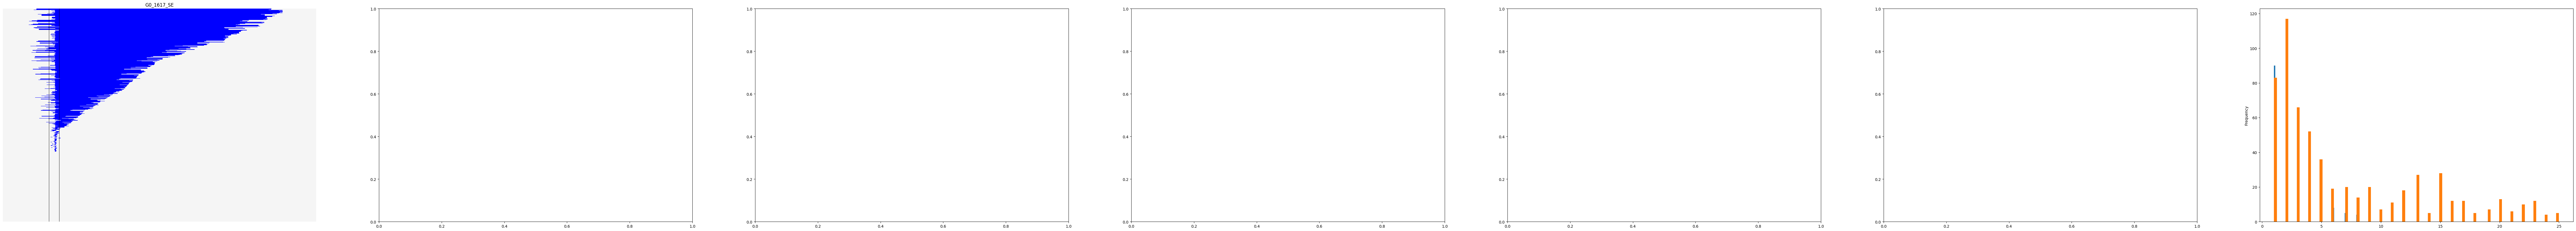

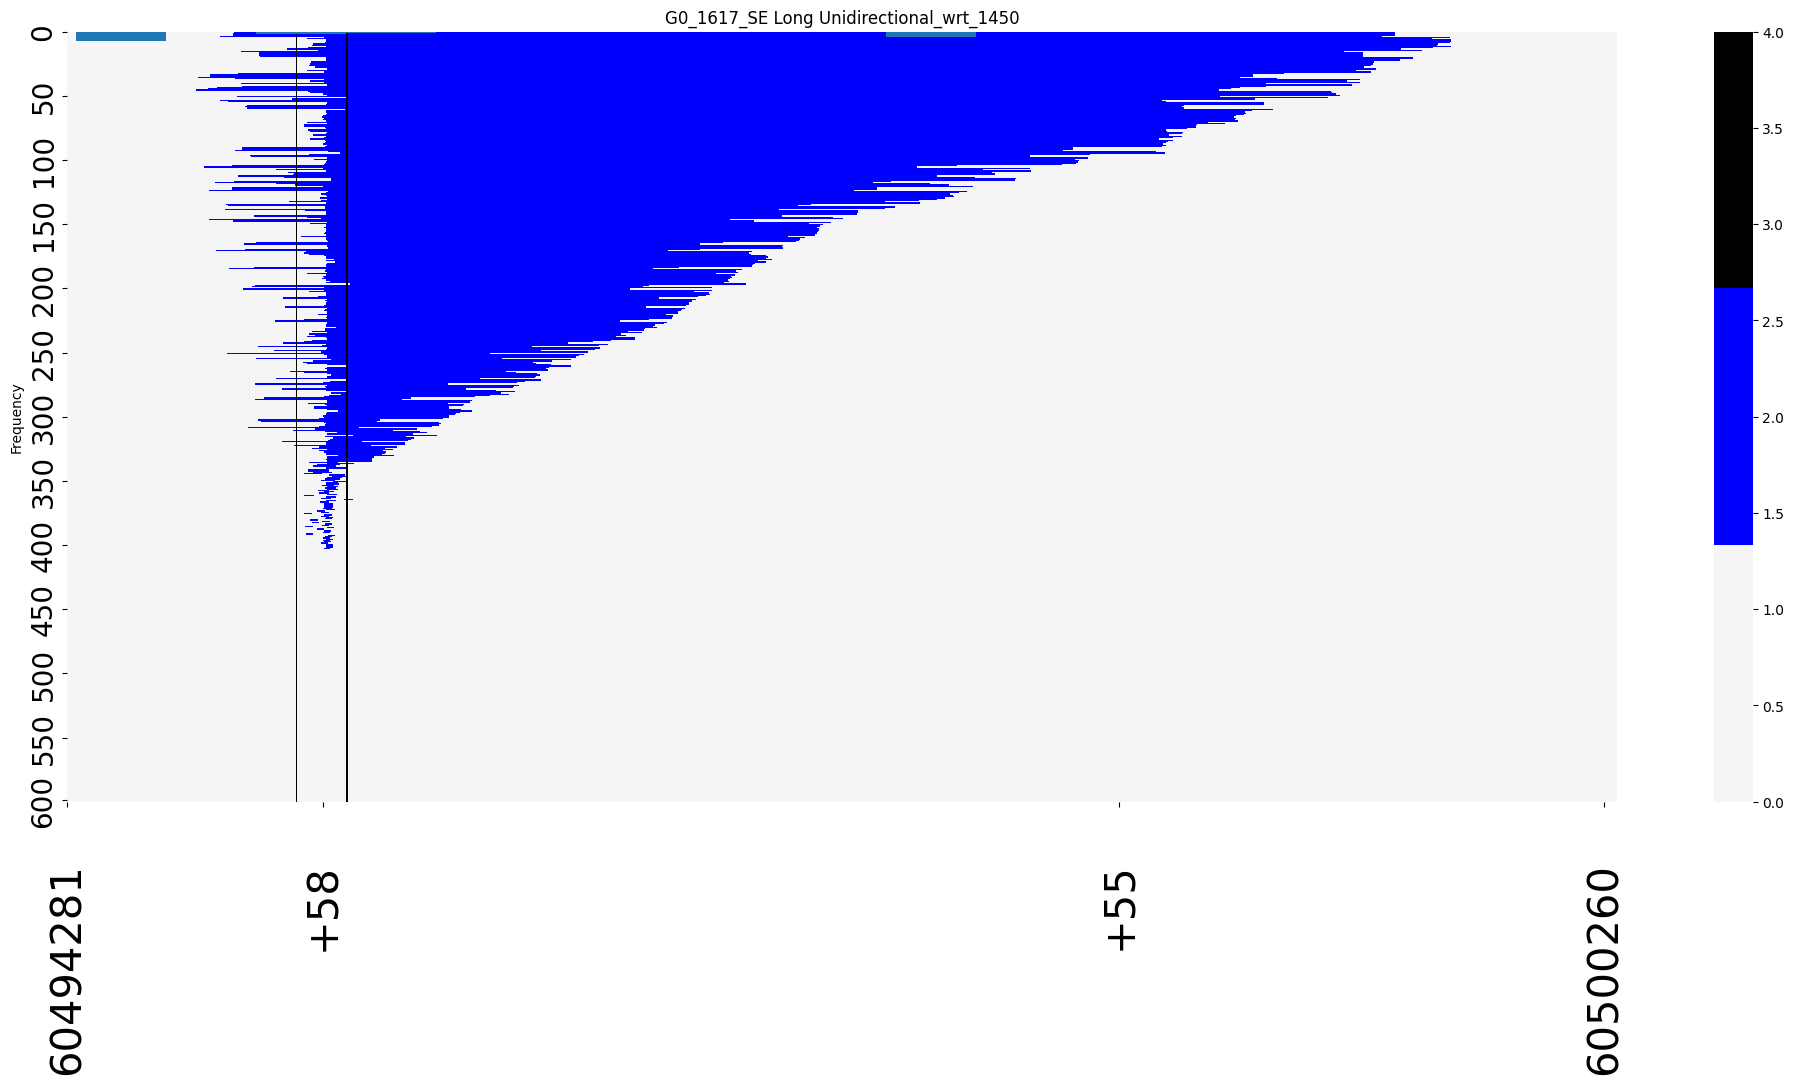

mkdir: cannot create directory ‘bed_files/G0_1617_SE’: File exists


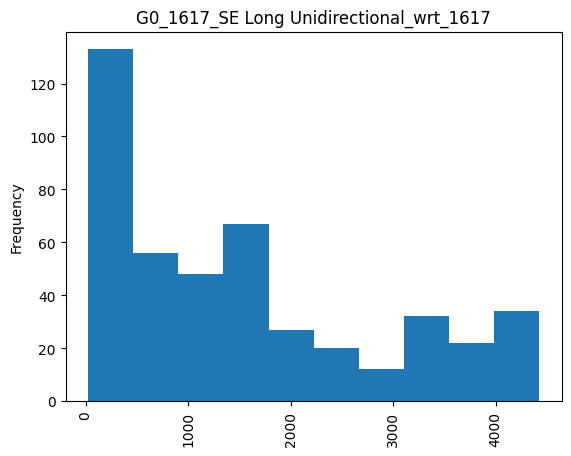

mkdir: cannot create directory ‘bed_files/G0_1617_SE’: File exists


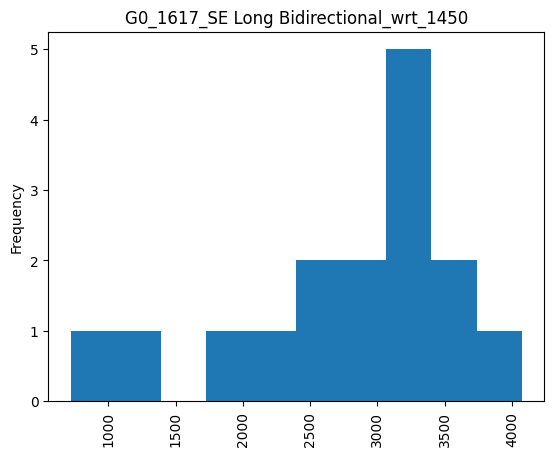

mkdir: cannot create directory ‘bed_files/G0_1617_SE’: File exists


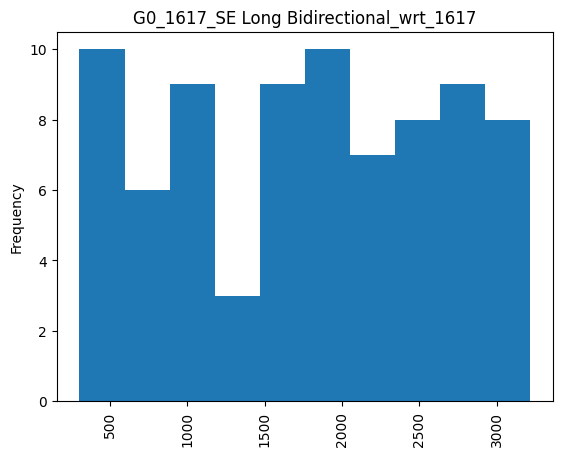

mkdir: cannot create directory ‘bed_files/G0_1617_SE’: File exists


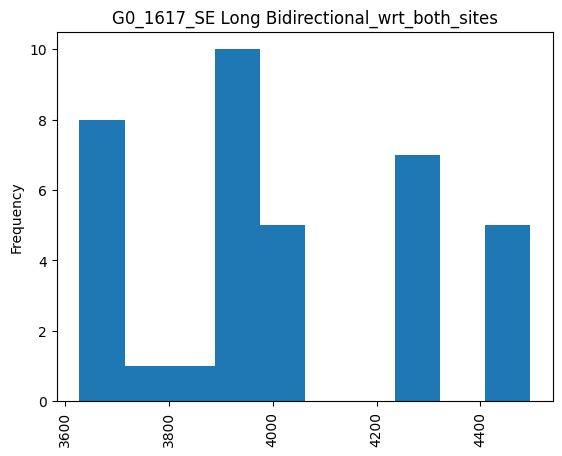

mkdir: cannot create directory ‘bed_files/G0_1617_SE’: File exists


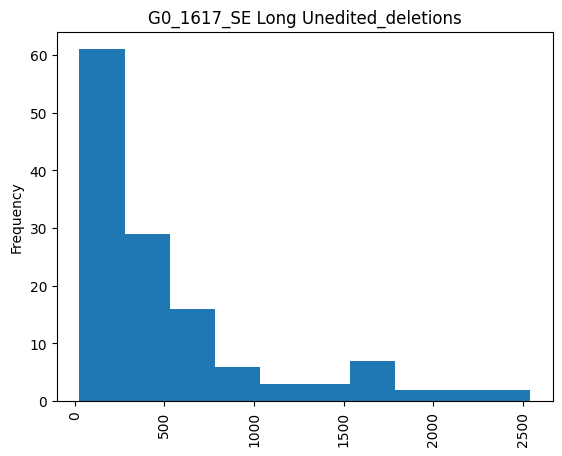

G1_1617_SE name_df
mkdir: cannot create directory ‘bed_files/G1_1617_SE’: File exists
name_df: G1_1617_SE
G1_1617_SE pass
(456, 6000)
sampling 456 from G1_1617_SE
144
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 599]
mkdir: cannot create directory ‘bed_files/G1_1617_SE’: File exists


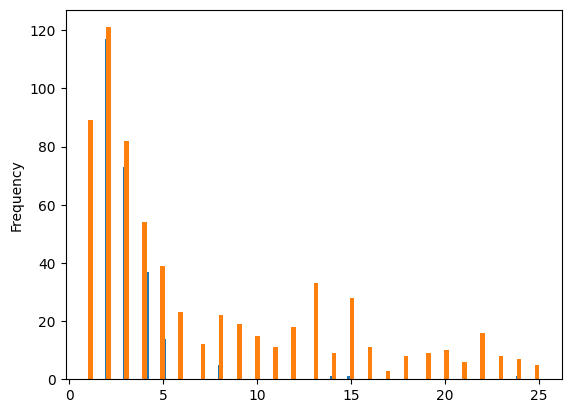

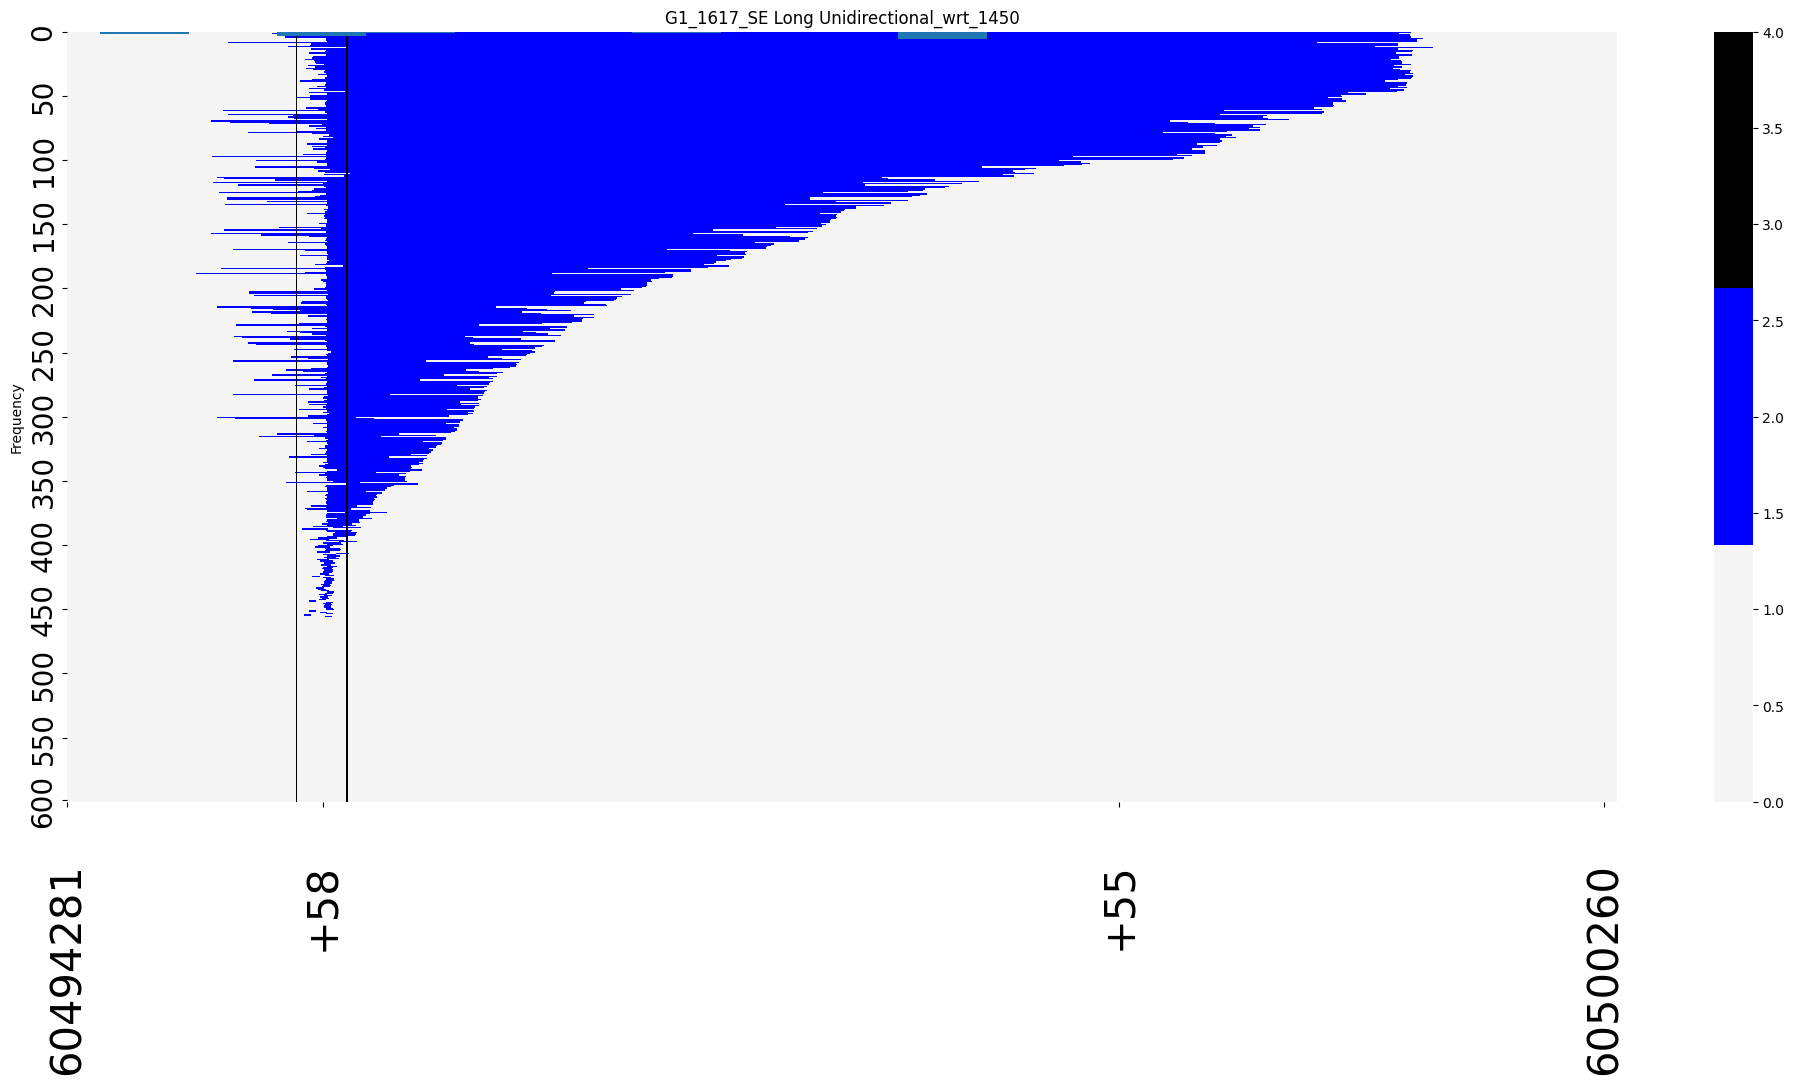

mkdir: cannot create directory ‘bed_files/G1_1617_SE’: File exists


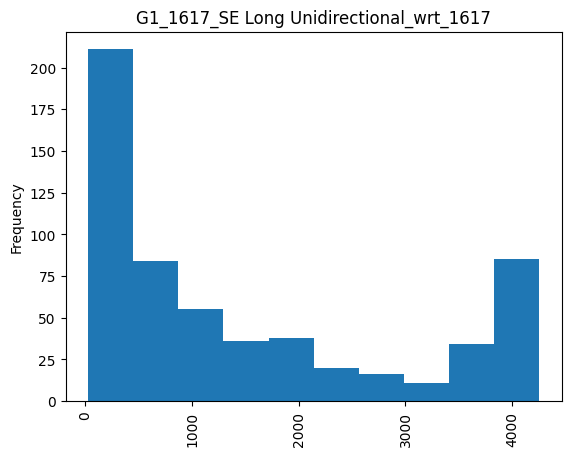

mkdir: cannot create directory ‘bed_files/G1_1617_SE’: File exists


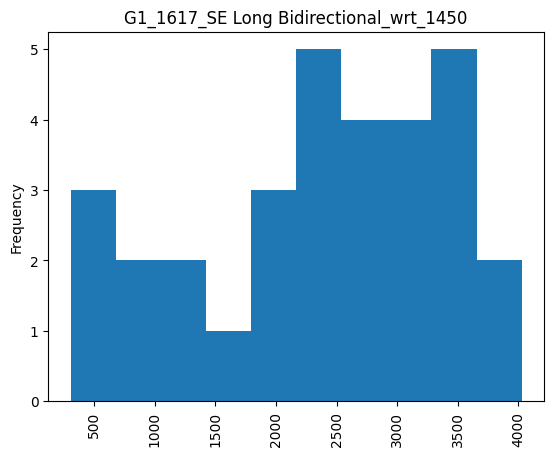

mkdir: cannot create directory ‘bed_files/G1_1617_SE’: File exists


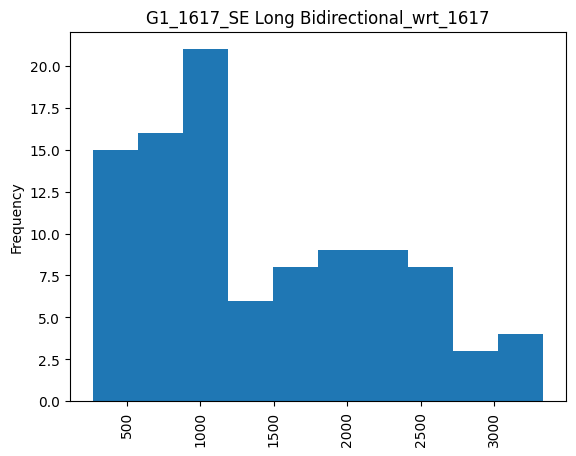

mkdir: cannot create directory ‘bed_files/G1_1617_SE’: File exists


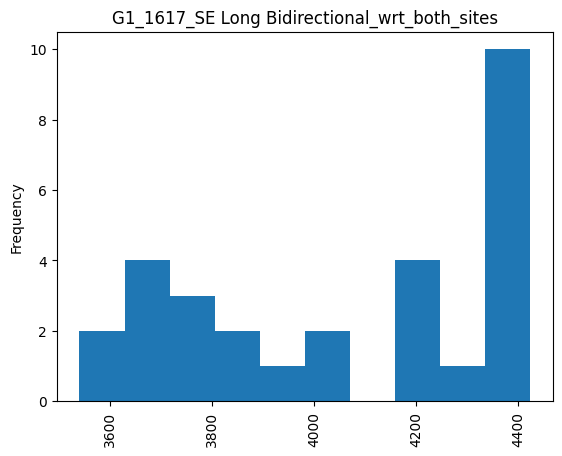

mkdir: cannot create directory ‘bed_files/G1_1617_SE’: File exists


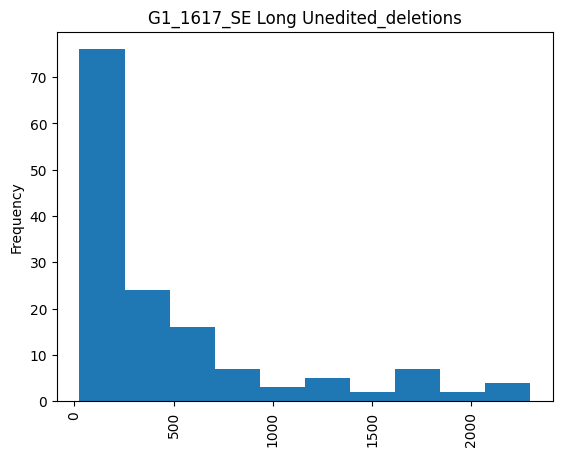

S_1617_SE name_df
mkdir: cannot create directory ‘bed_files/S_1617_SE’: File exists
name_df: S_1617_SE
S_1617_SE pass
(591, 6000)
sampling 591 from S_1617_SE
9
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 599]
mkdir: cannot create directory ‘bed_files/S_1617_SE’: File exists


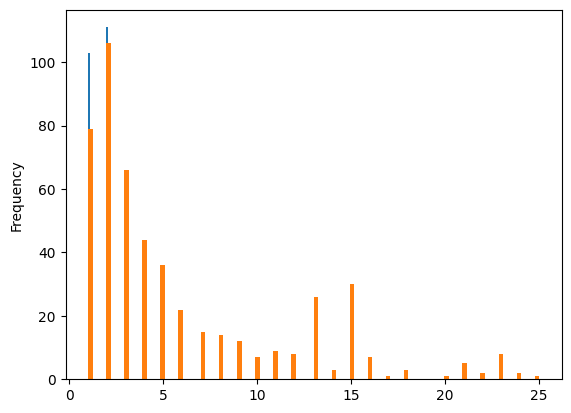

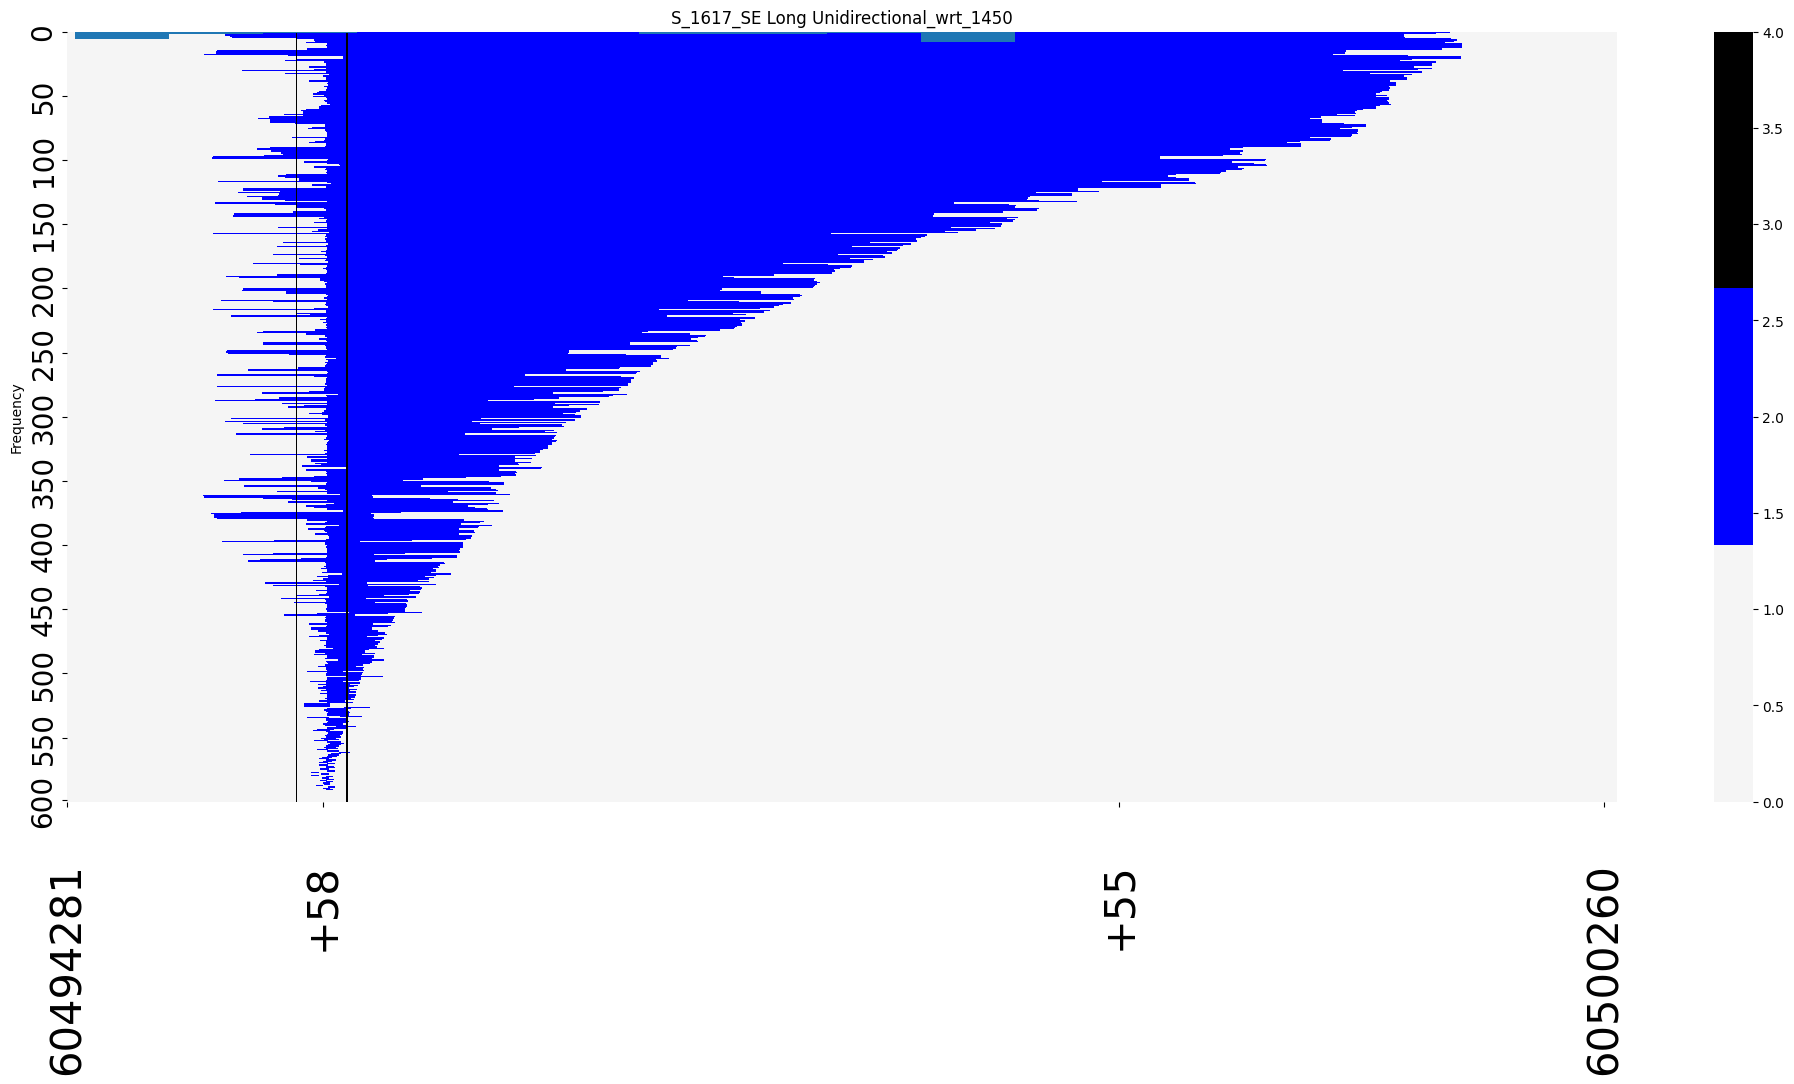

mkdir: cannot create directory ‘bed_files/S_1617_SE’: File exists


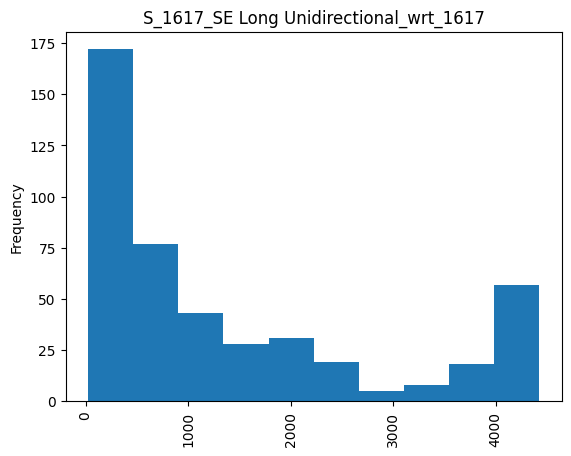

mkdir: cannot create directory ‘bed_files/S_1617_SE’: File exists


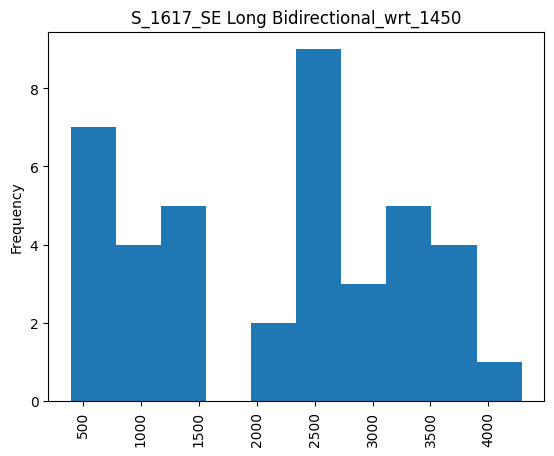

mkdir: cannot create directory ‘bed_files/S_1617_SE’: File exists


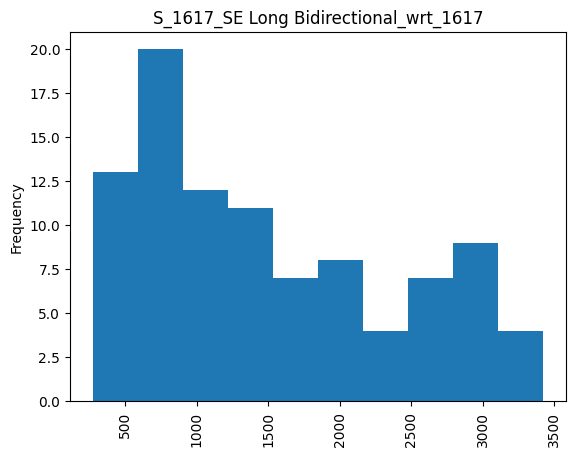

mkdir: cannot create directory ‘bed_files/S_1617_SE’: File exists


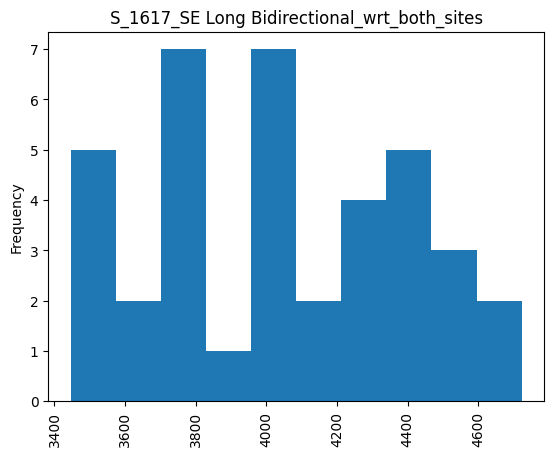

mkdir: cannot create directory ‘bed_files/S_1617_SE’: File exists


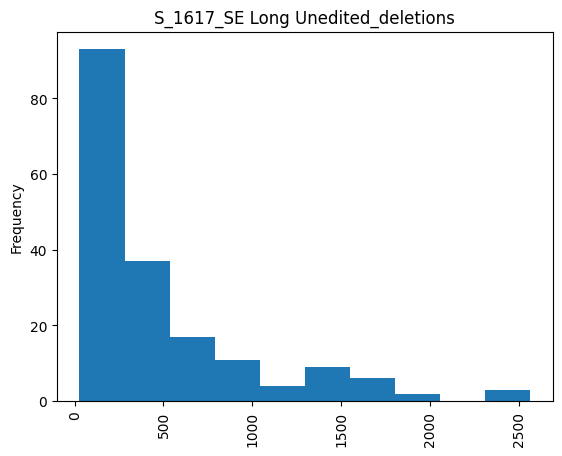

G2_M_1617_SE name_df
mkdir: cannot create directory ‘bed_files/G2_M_1617_SE’: File exists
name_df: G2_M_1617_SE
G2_M_1617_SE pass
(497, 6000)
sampling 497 from G2_M_1617_SE
103
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 599]
mkdir: cannot create directory ‘bed_files/G2_M_1617_SE’: File exists


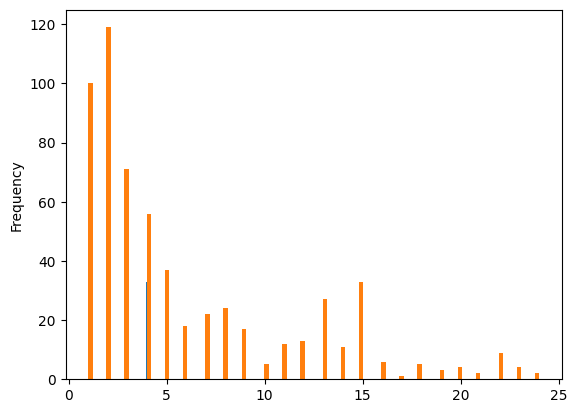

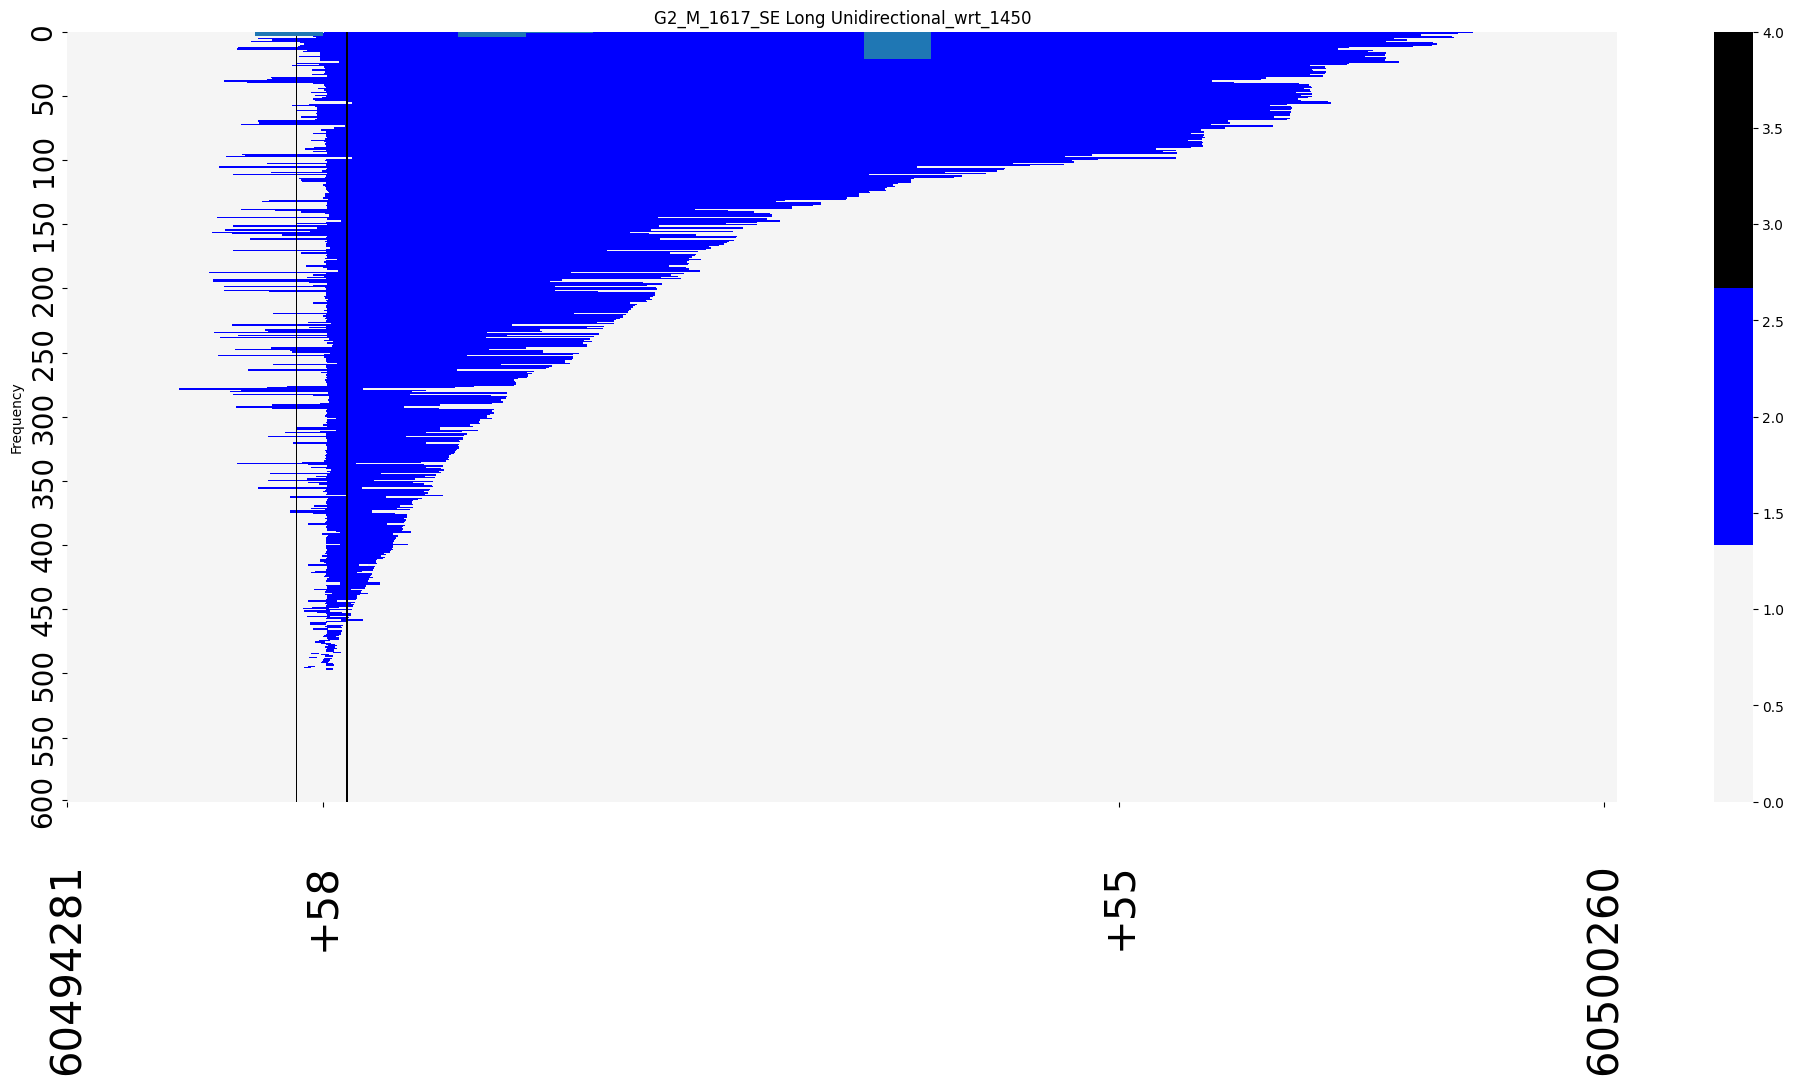

mkdir: cannot create directory ‘bed_files/G2_M_1617_SE’: File exists


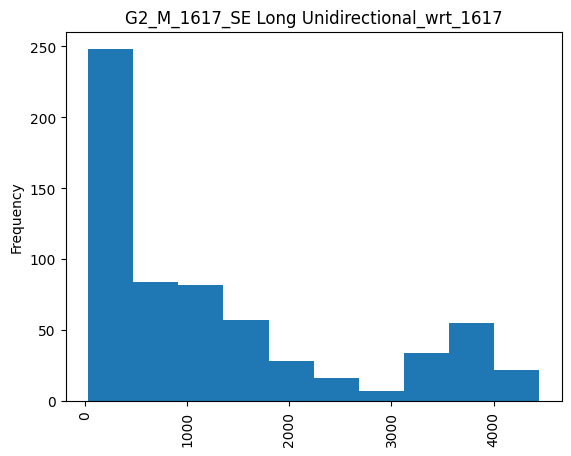

mkdir: cannot create directory ‘bed_files/G2_M_1617_SE’: File exists


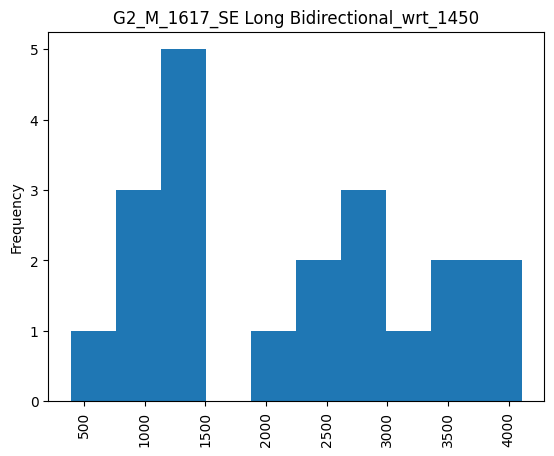

mkdir: cannot create directory ‘bed_files/G2_M_1617_SE’: File exists


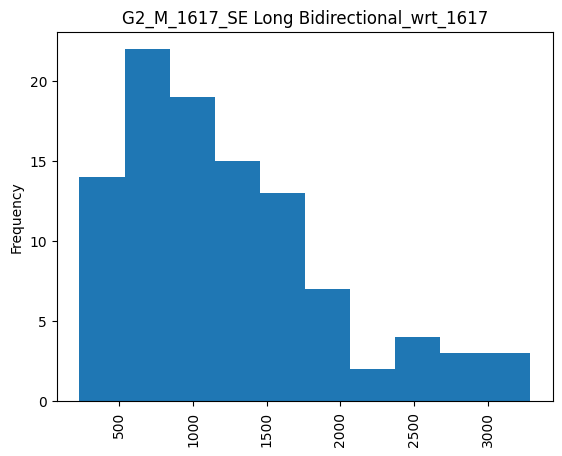

mkdir: cannot create directory ‘bed_files/G2_M_1617_SE’: File exists


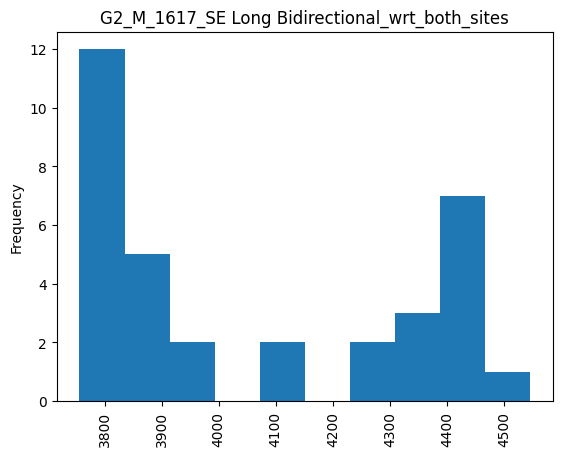

mkdir: cannot create directory ‘bed_files/G2_M_1617_SE’: File exists


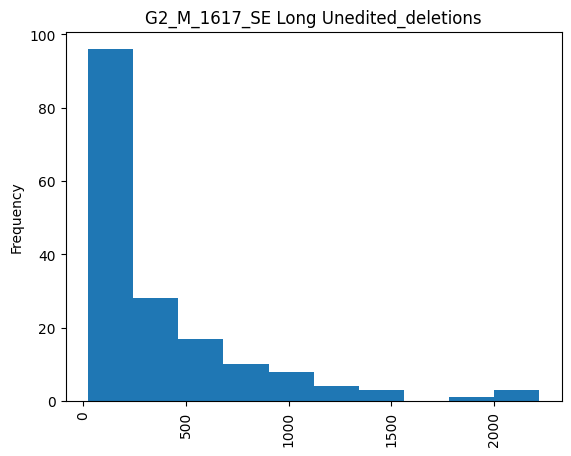

HPC_1617_SE name_df
mkdir: cannot create directory ‘bed_files/HPC_1617_SE’: File exists
name_df: HPC_1617_SE
HPC_1617_SE pass
(425, 6000)
sampling 425 from HPC_1617_SE
175
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 599]
mkdir: cannot create directory ‘bed_files/HPC_1617_SE’: File exists


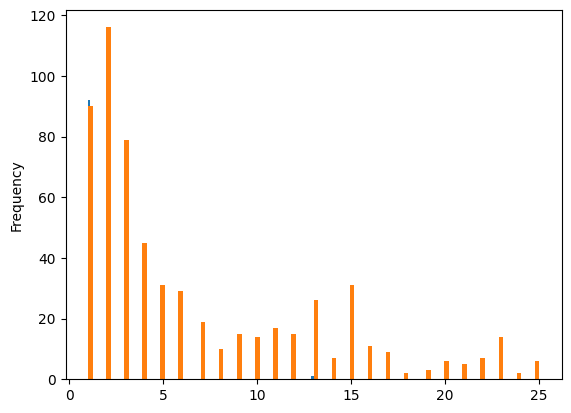

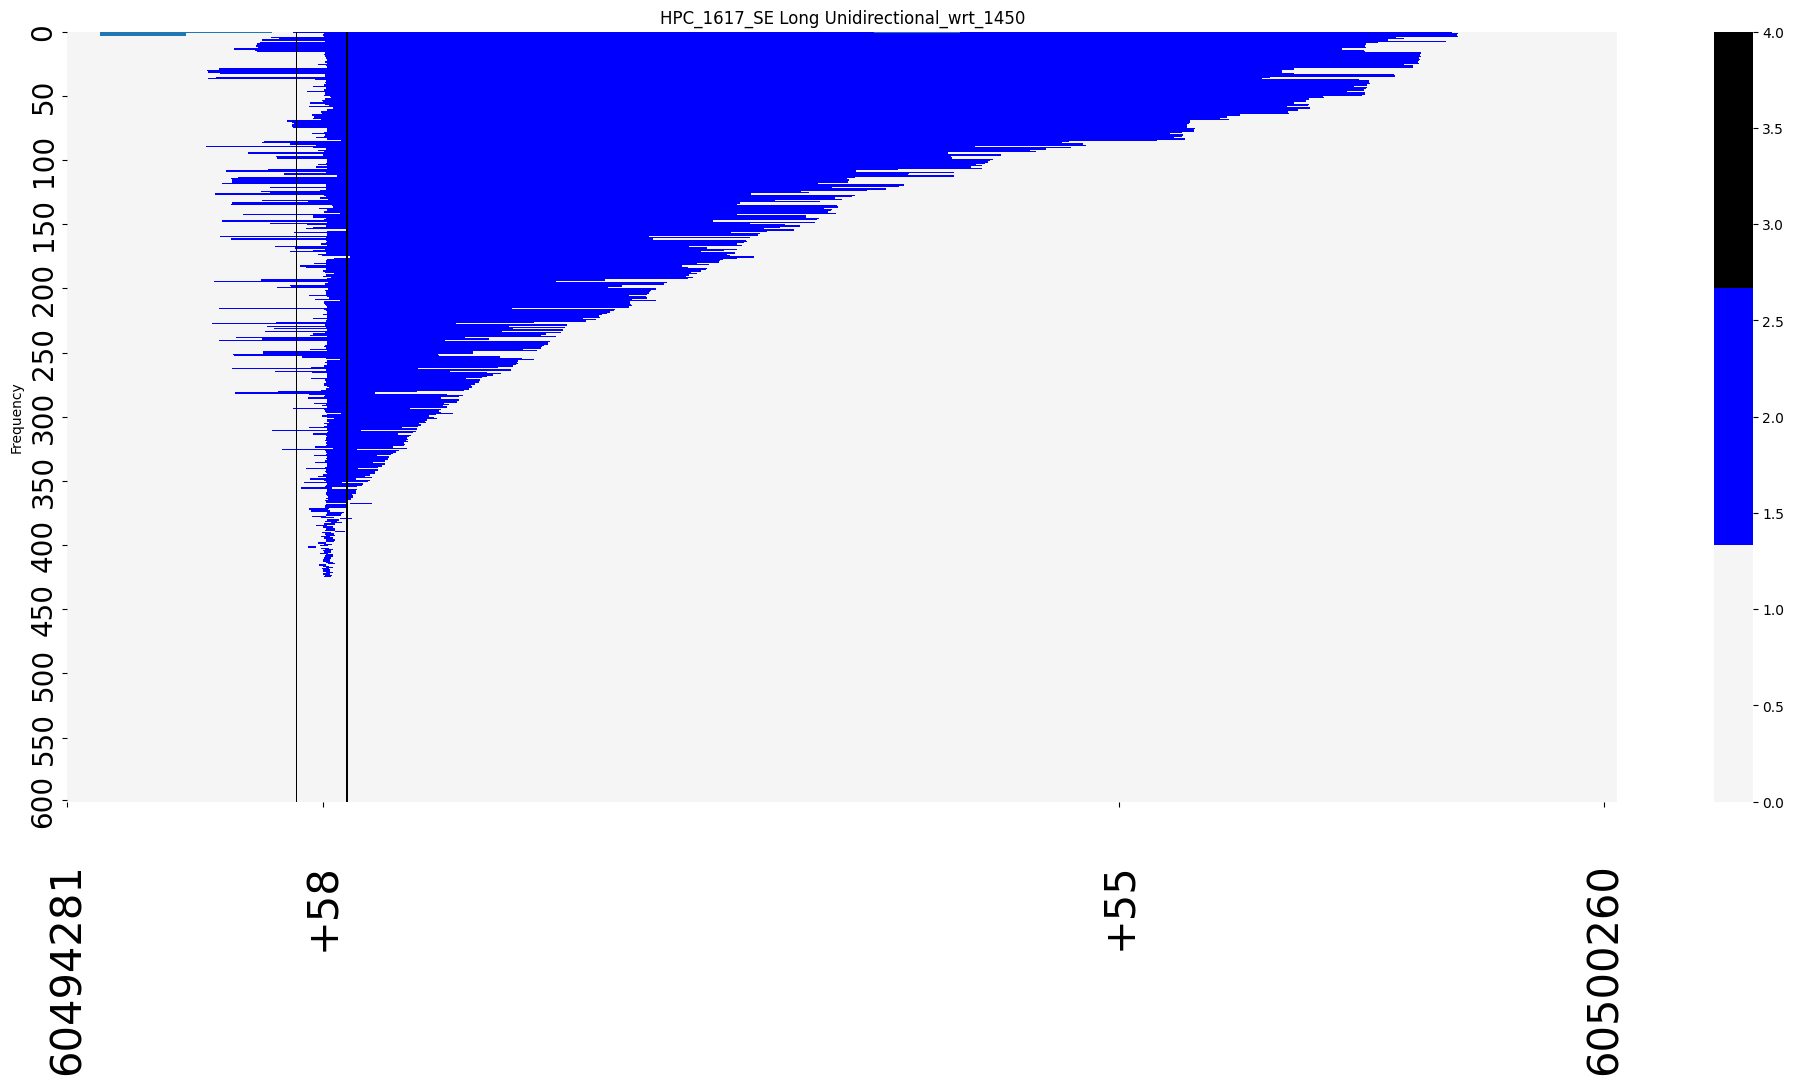

mkdir: cannot create directory ‘bed_files/HPC_1617_SE’: File exists


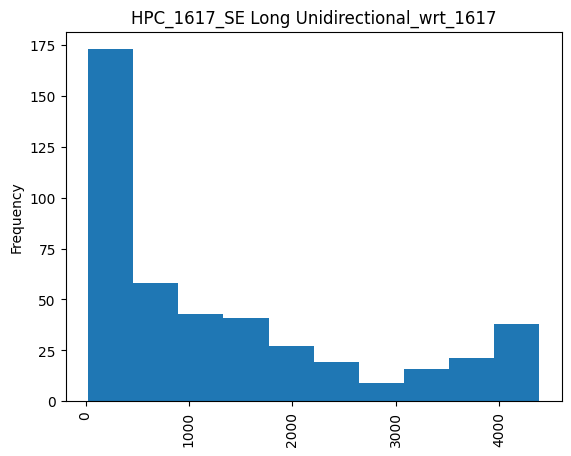

mkdir: cannot create directory ‘bed_files/HPC_1617_SE’: File exists


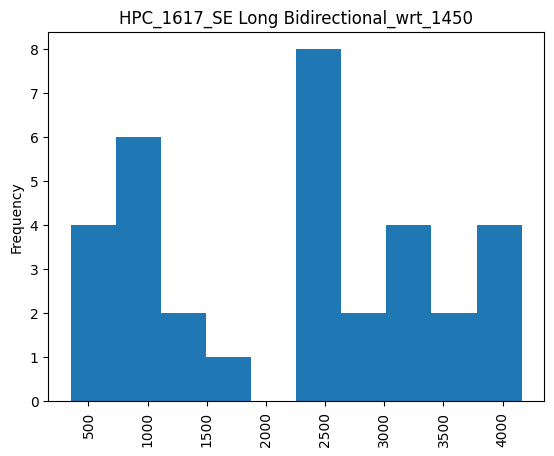

mkdir: cannot create directory ‘bed_files/HPC_1617_SE’: File exists


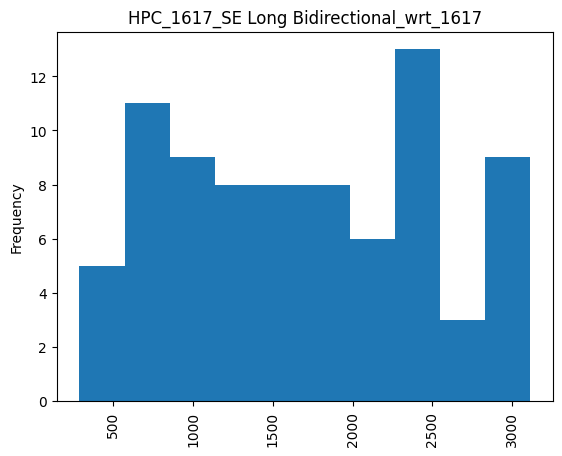

mkdir: cannot create directory ‘bed_files/HPC_1617_SE’: File exists


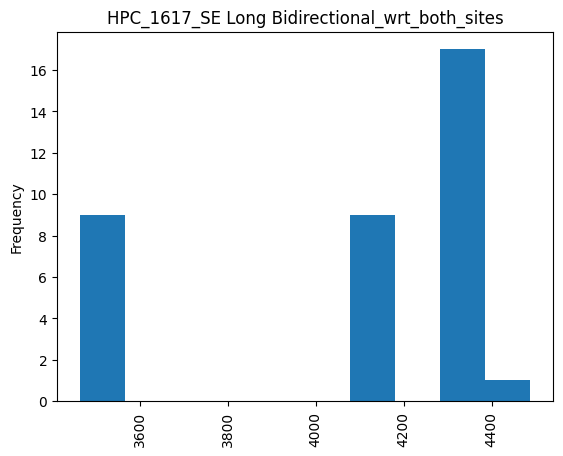

mkdir: cannot create directory ‘bed_files/HPC_1617_SE’: File exists


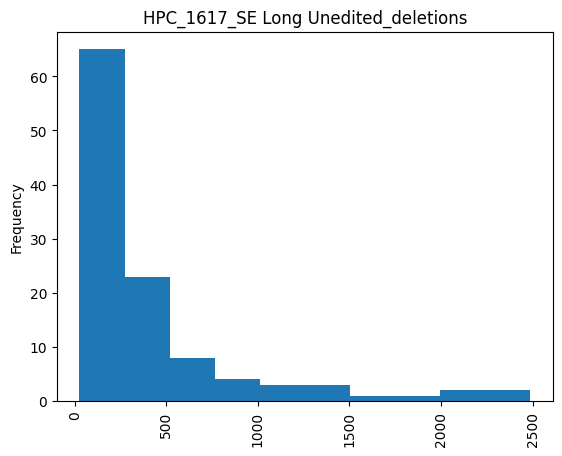

HSC_1617_SE name_df
mkdir: cannot create directory ‘bed_files/HSC_1617_SE’: File exists
name_df: HSC_1617_SE
HSC_1617_SE pass
(332, 6000)
sampling 332 from HSC_1617_SE
268
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 599]
mkdir: cannot create directory ‘bed_files/HSC_1617_SE’: File exists


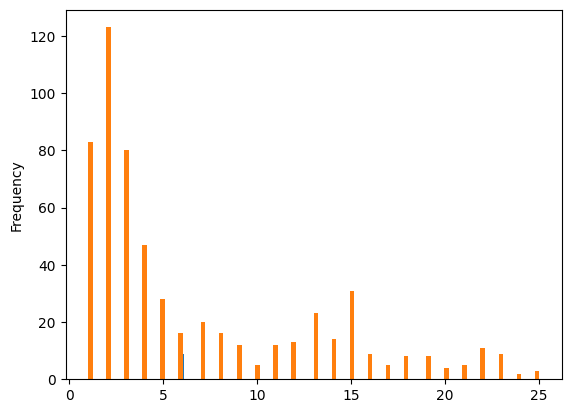

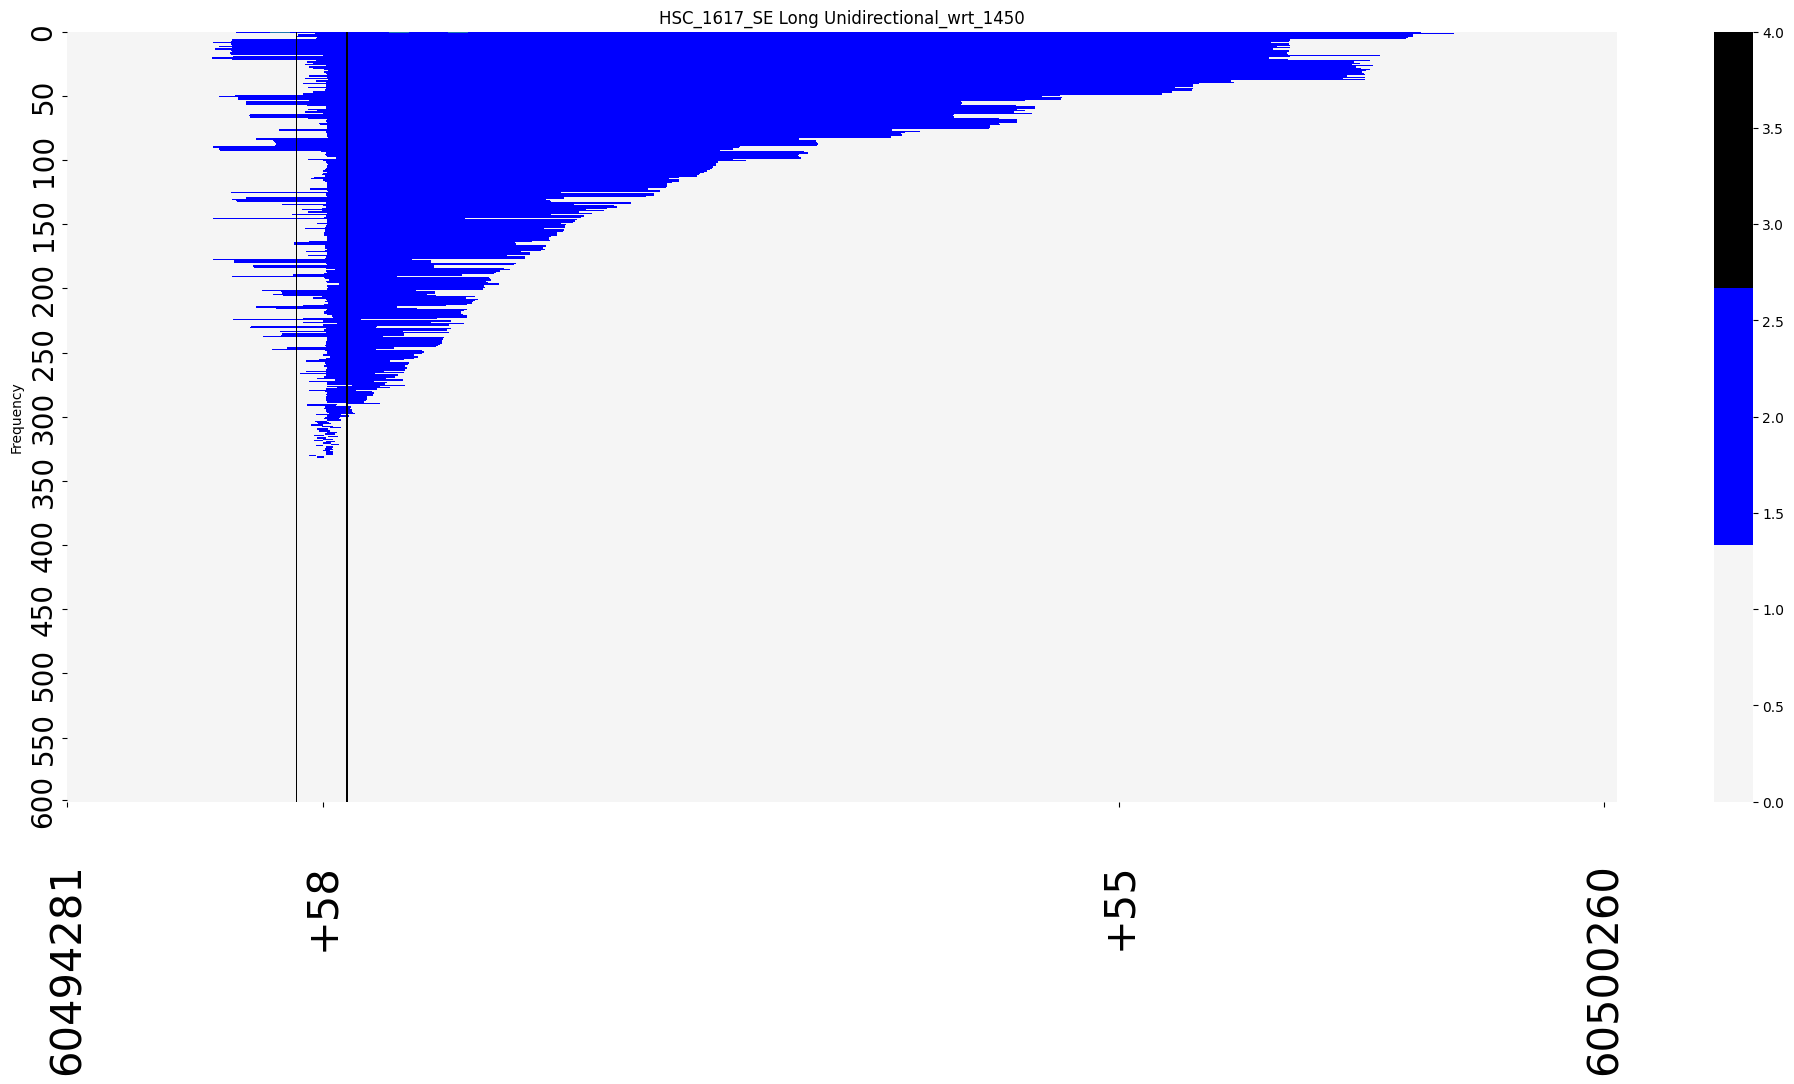

mkdir: cannot create directory ‘bed_files/HSC_1617_SE’: File exists


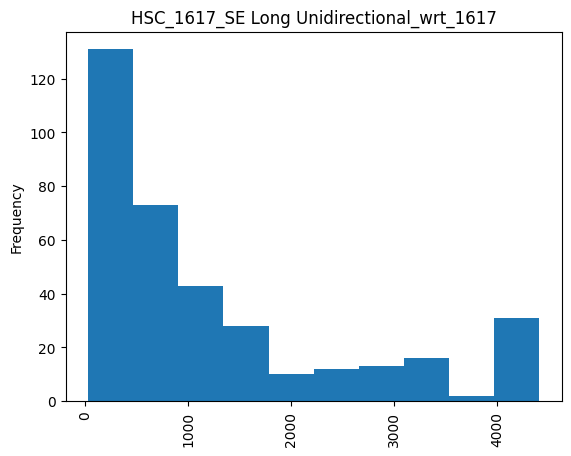

mkdir: cannot create directory ‘bed_files/HSC_1617_SE’: File exists


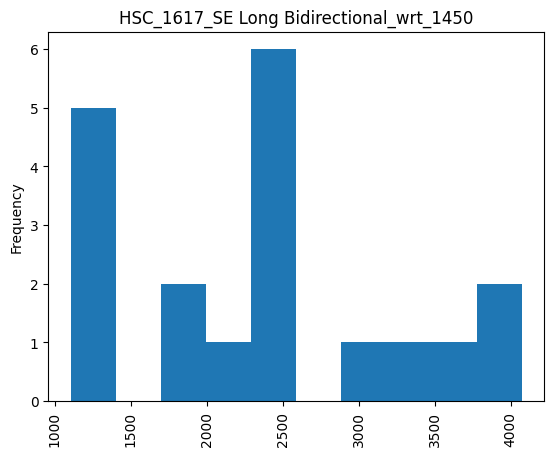

mkdir: cannot create directory ‘bed_files/HSC_1617_SE’: File exists


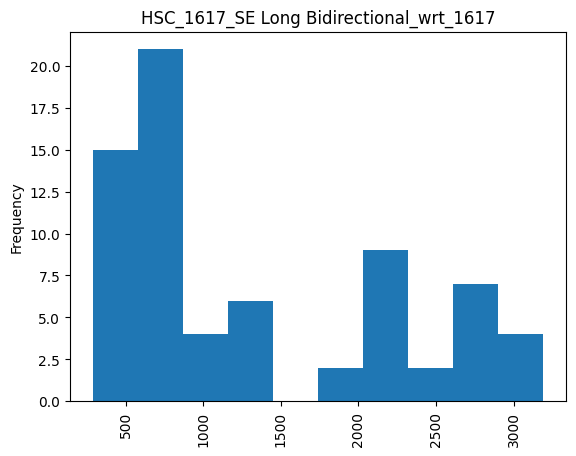

mkdir: cannot create directory ‘bed_files/HSC_1617_SE’: File exists


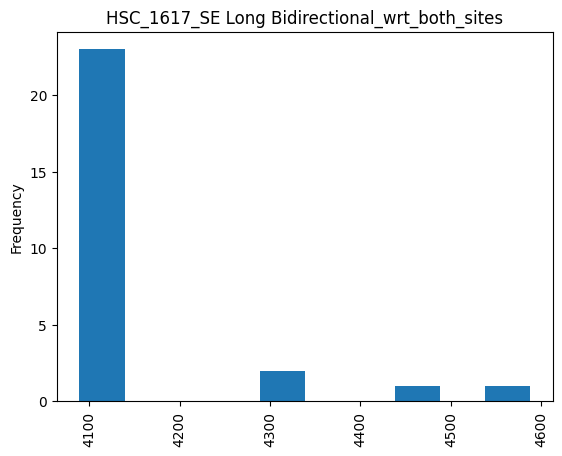

mkdir: cannot create directory ‘bed_files/HSC_1617_SE’: File exists


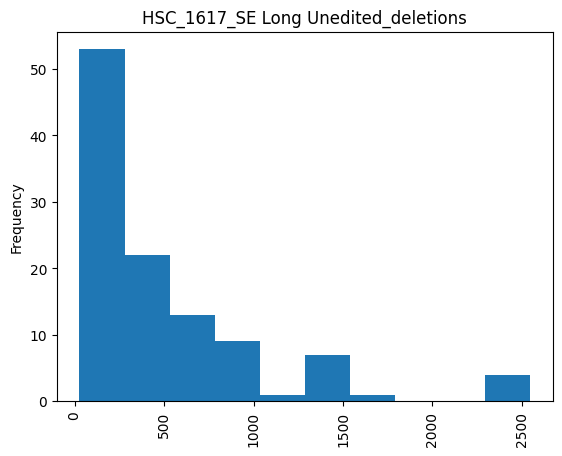

Mock_1617_SE name_df
mkdir: cannot create directory ‘bed_files/Mock_1617_SE’: File exists
name_df: Mock_1617_SE
Mock_1617_SE pass
(0, 6000)
sampling 0 from Mock_1617_SE
600
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 599]
mkdir: cannot create directory ‘bed_files/Mock_1617_SE’: File exists


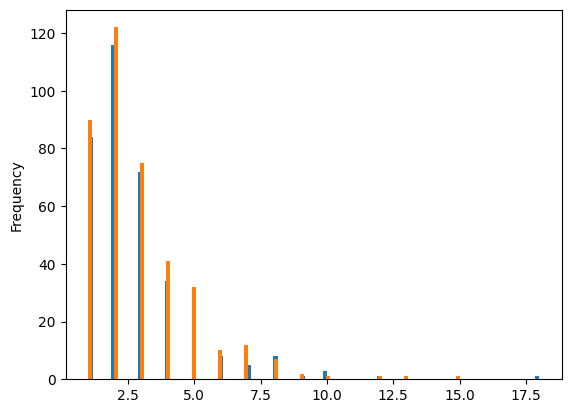

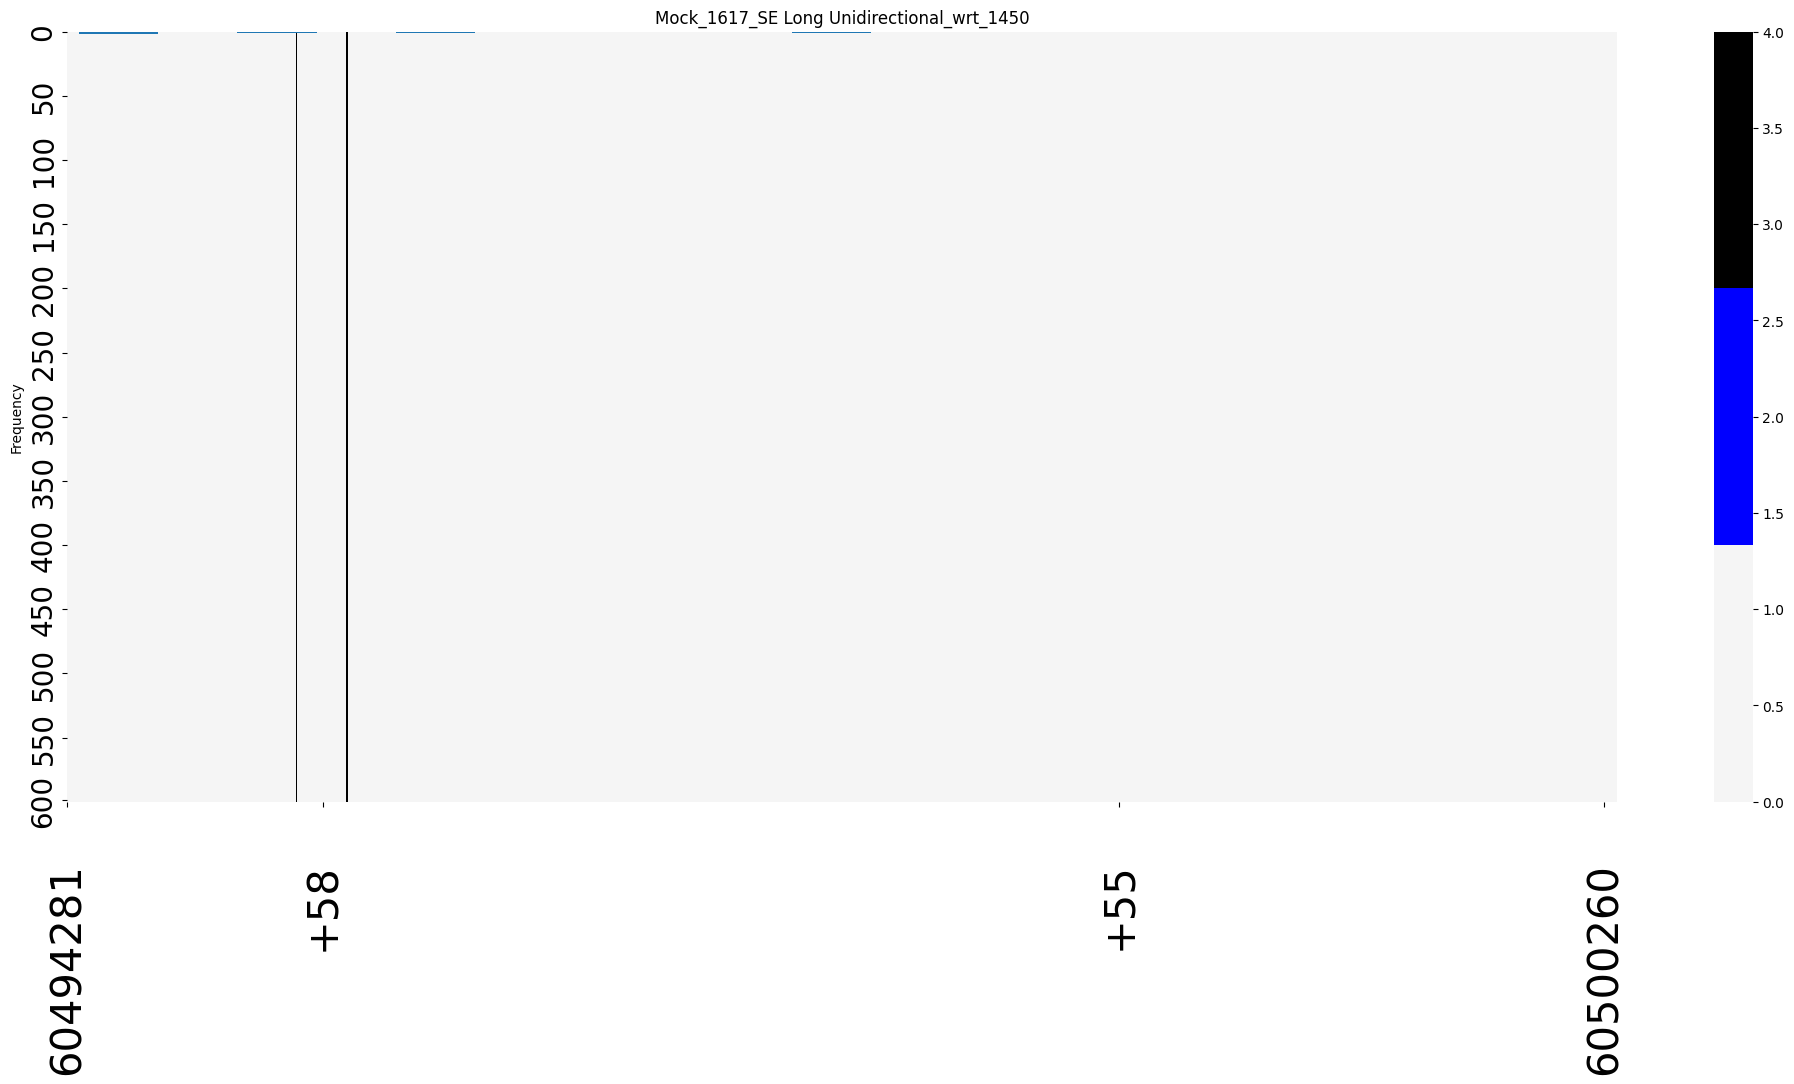

mkdir: cannot create directory ‘bed_files/Mock_1617_SE’: File exists


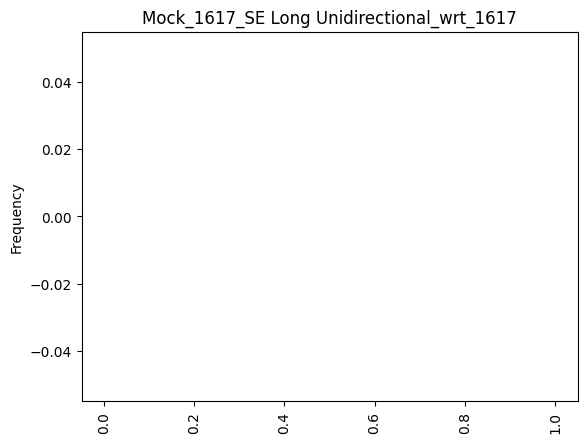

mkdir: cannot create directory ‘bed_files/Mock_1617_SE’: File exists


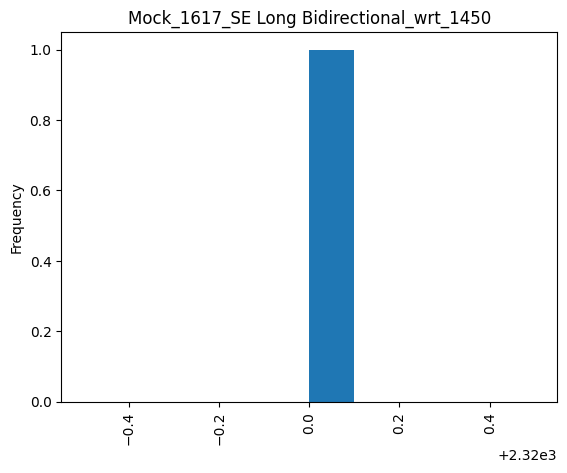

mkdir: cannot create directory ‘bed_files/Mock_1617_SE’: File exists


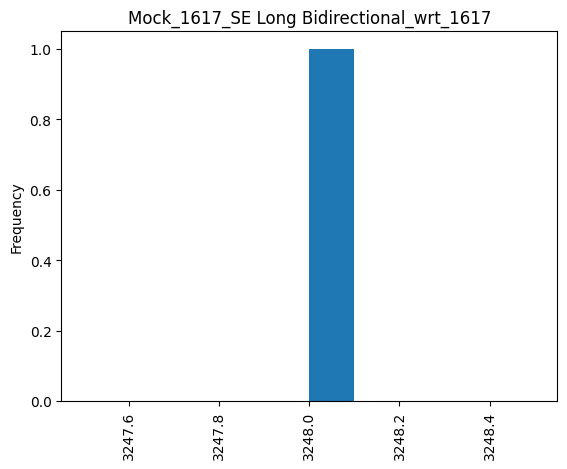

mkdir: cannot create directory ‘bed_files/Mock_1617_SE’: File exists


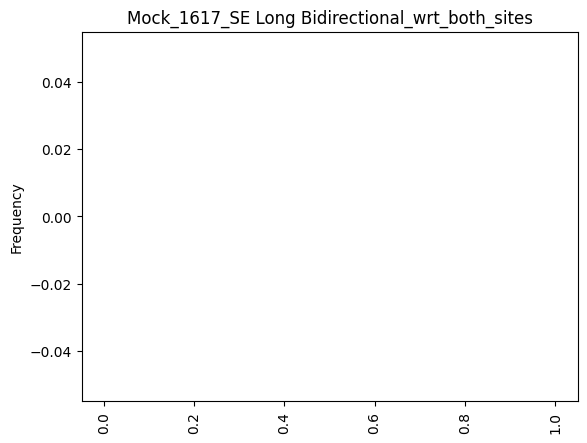

mkdir: cannot create directory ‘bed_files/Mock_1617_SE’: File exists


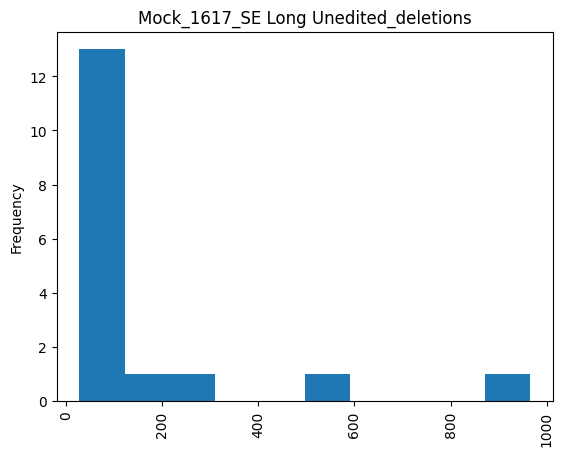

  adding: bed_files/ (stored 0%)
  adding: bed_files/S_1617_SE/ (stored 0%)
  adding: bed_files/S_1617_SE/small_editing_1450.bed (deflated 80%)
  adding: bed_files/S_1617_SE/Unedited_deletions.bed (deflated 69%)
  adding: bed_files/S_1617_SE/small_editing_1617.bed (deflated 80%)
  adding: bed_files/S_1617_SE/Unidirectional_wrt_1450.bed (deflated 66%)
  adding: bed_files/S_1617_SE/Bidirectional_wrt_1617.bed (deflated 70%)
  adding: bed_files/S_1617_SE/Unidirectional_wrt_1617.bed (deflated 75%)
  adding: bed_files/S_1617_SE/Bidirectional_wrt_both_sites.bed (deflated 71%)
  adding: bed_files/S_1617_SE/Bidirectional_wrt_1450.bed (deflated 68%)
  adding: bed_files/Mock_1617_SE/ (stored 0%)
  adding: bed_files/Mock_1617_SE/small_editing_1450.bed (deflated 81%)
  adding: bed_files/Mock_1617_SE/Unedited_deletions.bed (deflated 63%)
  adding: bed_files/Mock_1617_SE/small_editing_1617.bed (deflated 80%)
  adding: bed_files/Mock_1617_SE/Unidirectional_wrt_1450.bed (deflated 44%)
  adding: bed_fil

ValueError: Number of columns must be a positive integer, not 0

<Figure size 12000x1000 with 0 Axes>

In [ ]:

!rm -r bed_files
!rm bed_files.zip
!mkdir bed_files

from matplotlib.colors import LinearSegmentedColormap, ListedColormap


import seaborn as sns



def convert_scale(use_number):
  highest =use_number + 50
  return [[(x -  use_number), x ] for x in range (0,highest,50) if (x -  use_number) > 0][0][1]

def add_new_bar(start, end, category ):
  start= start - START_CLIP
  end= end - START_CLIP

  #print (start,end )
  bed_v = np.array([0] * 6000)
  #print (category)
  bed_v[start:end] = int(category)
  #print( np.max(bed_v), bed_v, 'bed_v_max' )
  #print (bed_v[start-10:end+10])
  out = bed_v.tolist()
  #print( np.max(out), 'out' )
  return out



def generated_bed(df_in, name_df_in, f_name,):
  !mkdir bed_files/$name_df_in
  df_bed = df_in[['chrom', 'start', 'end', 'score', 'region_len']].copy()
  df_bed['strand'] = '+'
  df_bed.to_csv(f'bed_files/{name_df_in}/{f_name}.bed', sep='\t', index=None, header=None)


def generate_plots(captured_dict_df_all_samples, sample_dict=None,
                   ADJUST_SIZE_PLOT=None,
                   SAMPLE_ADJUST_CATEGORY= 'Input_3_SCD_4_24h_1618_1449', name_tag='1', ax=None):


  ADJUST_SIZE_PLOT = convert_scale(ADJUST_SIZE_PLOT)

 #Change SAMPLE_ADJUST_CATEGORY = 'SE_' for 1617-1450 samples

  #fig, ax = plt.subplots(1,3 , figsize=(75,10))
  #fig, ax = plt.subplots(1, figsize=(75, 10))


  ploting_counter = 0

  for name_df, df_all_ploting in captured_dict_df_all_samples.items():
    print (name_df, 'name_df')
    #mod short
    df_all_ploting['small_editing_1450'] = df_all_ploting.apply(lambda x : x['small_on_1450_site'] == True or x['small_crossing_1450_site'] == True , axis=1)
    df_all_ploting['small_editing_1617'] = df_all_ploting.apply(lambda x : x['small_on_1617_site'] == True or x['small_crossing_1617_site'] == True , axis=1)
    small_to_plot= ['small_editing_1450','small_editing_1617' ]

    for f in  small_to_plot:

      df_all_ploting_filtered = df_all_ploting.query(f'score == "{TYPE_OF_EVENT}" and  {f} == True and region_len <= {REGION_LEN}')
      df_all_ploting_filtered['region_len'].plot(kind='hist', bins = 100)
      generated_bed(df_all_ploting_filtered, name_df, f ) #small

    #   plt.title(f'{name_df} Short {f}')
    #   plt.show()

    #mod long
    df_all_ploting['Unidirectional_wrt_1450'] = df_all_ploting[['cut_start_1450_edit_ending_after_1617','cut_start_1450_edit_ending_before_1617','starting_before_1450_and_ending_at_1450_cutsite']].sum(1).apply(bool).values
    df_all_ploting['Unidirectional_wrt_1617'] = df_all_ploting[['cut_end_1617_edit_ending_after_1450',  'cut_end_1617_edit_ending_before_1450',  'cut_start_1617_and_ending_after_1617']].sum(1).apply(bool).values
    df_all_ploting['Bidirectional_wrt_1450'] = df_all_ploting[['non_expectede_editing_start_before_1450_and_end_1617_before']].sum(1).apply(bool).values
    df_all_ploting['Bidirectional_wrt_1617'] = df_all_ploting[['non_expectede_editing_start_inbetween_cut_sites_and_end_after_1617']].sum(1).apply(bool).values
    df_all_ploting['Bidirectional_wrt_both_sites'] = df_all_ploting[['non_expectede_editing_start_before_1450_and_end_1617_after']].sum(1).apply(bool).values
    df_all_ploting['Unedited_deletions'] = df_all_ploting[['non_expectede_starts_and_ends_between', 'non_expectede_editing_starting_before_1450_and_ending_before_1450', 'non_expectede_editing_starting_after_1617_and_ending_after_1617']].sum(1).apply(bool).values
    # df_all_ploting['Programmed_3_1kb'] = df_all_ploting[['double_editing_start_cut_1450_end_cut_1617']].sum(1).apply(bool).values

    # df_all_ploting['Uni_Bi_wrt_1450'] = df_all_ploting[['Unidirectional_wrt_1450', 'Bidirectional_wrt_1450']].sum(1).apply(bool).values
    # df_all_ploting['Uni_Bi_wrt_1617'] = df_all_ploting[['Unidirectional_wrt_1617', 'Bidirectional_wrt_1617']].sum(1).apply(bool).values


    plot_lens = ['Unidirectional_wrt_1450',
                  'Unidirectional_wrt_1617',
                  'Bidirectional_wrt_1450',
                  'Bidirectional_wrt_1617',
                  'Bidirectional_wrt_both_sites',
                  'Unedited_deletions']

    df_all_ploting = df_all_ploting[df_all_ploting[plot_lens].sum(1) == 1].copy()


    # colors_dict = {'Unidirectional_wrt_1450':'blue',
    # 'Unidirectional_wrt_1617':'blue',
    # 'Bidirectional_wrt_1450':'blue',
    # 'Bidirectional_wrt_1617':'blue',
    # 'Bidirectional_wrt_both_sites':'blue',
    # 'Programmed_3_1kb':'red'}


    colors_dict = {'Unidirectional_wrt_1450':'blue',
    'Unidirectional_wrt_1617':'blue',
    'Bidirectional_wrt_1450':'blue',
    'Bidirectional_wrt_1617':'blue',
    'Bidirectional_wrt_both_sites':'blue'}

    # color_to_number = dict(zip(['red', 'blue', 'black'],[2,1,3]))
    color_to_number = dict(zip(['blue', 'black'],[2, 3]))
    inject_filter= ''
    print ('name_df:', name_df)
    if '_SE' in name_df:
      inject_filter = "and Bidirectional_wrt_1450 == False and Unidirectional_wrt_1450 == False"



    df_all_tornado = df_all_ploting.query(f"Unedited_deletions == False and score == 'D' and region_len > {REGION_LEN}   {inject_filter} ").copy() # probaby we will filter the SE here


    plot_tornado_cols = list(colors_dict.keys())
    plot_tornado_cols
    df_all_tornado['plot_class']  = df_all_tornado[plot_tornado_cols].apply(lambda x : plot_tornado_cols[x.argmax()] ,axis=1)
    df_all_tornado['plot_color'] = df_all_tornado['plot_class'].apply(lambda x: colors_dict[x] )
    df_all_tornado['color_to_number'] =  df_all_tornado['plot_color'].apply(lambda x: color_to_number[x] )
    df_all_tornado = df_all_tornado.sort_values('region_len', ascending=False)

    df_heat  = pd.DataFrame(df_all_tornado.apply(lambda x : add_new_bar(x['start'],
                                                                        x['end'],
                                                                        x['color_to_number'] ) , axis=1).values.tolist())




    colors = ["whitesmoke",
              "blue",
              "black"]





    cmap = ListedColormap(colors)



    if sample_dict and SAMPLE_ADJUST_CATEGORY in name_df:
      print (name_df, 'pass')
      df_heat = df_heat.sample(sample_dict[name_df]).copy()
      print (df_heat.shape)
      if df_heat.shape == (0,0) :
        df_heat = pd.DataFrame(np.zeros( (ADJUST_SIZE_PLOT,6000)))

      print (f'sampling {sample_dict[name_df]} from {name_df}')
      df_heat = df_heat.iloc[np.argsort(df_heat.index.values)].copy()
      df_heat.index = [i for i in range(df_heat.shape[0])]



      #first_ref = CUT_SITE_1 - START_CLIP
      #second_ref = CUT_SITE_2 - START_CLIP

      original_cols = df_heat.columns.values
      df_heat = df_heat[original_cols[::-1]]
      df_heat.columns = original_cols


      if ADJUST_SIZE_PLOT:
        adjust_size = ADJUST_SIZE_PLOT - df_heat.shape[0]
        print(adjust_size)
        df_to_concat = pd.DataFrame(np.zeros([adjust_size, df_heat.shape[1]]) , columns = df_heat.columns)
        df_heat = pd.concat([df_heat, df_to_concat], ignore_index=False)



      first_ref =  END_CLIP - CUT_SITE_1
      second_ref =  END_CLIP - CUT_SITE_2


      if '_SE' in name_df:
        df_heat[ df_heat.columns[second_ref- EVENT_WINDOW:second_ref - EVENT_WINDOW +6]] = 4
        df_heat[ df_heat.columns[second_ref + EVENT_WINDOW-5:second_ref + EVENT_WINDOW ]] = 4
      else:
        df_heat[ df_heat.columns[first_ref - EVENT_WINDOW:first_ref - EVENT_WINDOW + 6]] = 4
        df_heat[ df_heat.columns[first_ref  + EVENT_WINDOW-5:first_ref + EVENT_WINDOW ]] = 4
        df_heat[ df_heat.columns[second_ref- EVENT_WINDOW:second_ref - EVENT_WINDOW +6]] = 4
        df_heat[ df_heat.columns[second_ref + EVENT_WINDOW-5:second_ref + EVENT_WINDOW ]] = 4


      #sns.despine(ax=ax[ploting_counter])  # Use the provided ax parameter

      #sns.heatmap(df_heat, cmap=cmap, ax=ax[ploting_counter])
      sns.heatmap(df_heat, cmap=cmap, ax=ax[ploting_counter], cbar=False)
      ax[ploting_counter].get_xaxis().set_visible(False)
      ax[ploting_counter].get_yaxis().set_visible(False)


      ax[ploting_counter].title.set_text(name_df)

      #ploting separated images
      fig_separated, ax_separated = plt.subplots(1, figsize=(25, 10))
      sns.heatmap(df_heat, cmap=cmap, ax=ax_separated)
      #xaxis
      ax_separated.set_xticks([0, 990, 4070, 5950], ['60494281', '+58', '+55' , '60500260'], fontsize=30, rotation=False)
      ax_separated.tick_params(axis='x', which='major', pad=40)

      #yaxis
      interval_each = 10 #%percentage of the
      interval_each = int(ADJUST_SIZE_PLOT/ 50)
      numbers_show = np.arange(0,ADJUST_SIZE_PLOT,int(ADJUST_SIZE_PLOT/interval_each)).tolist() + [ADJUST_SIZE_PLOT]
      print(numbers_show)
      index_number_show = np.arange(0,ADJUST_SIZE_PLOT,int(ADJUST_SIZE_PLOT/interval_each)).tolist()+ [ADJUST_SIZE_PLOT-1]
      print(index_number_show)
      ax_separated.set_yticks(index_number_show, numbers_show, fontsize=20, rotation=90)
      fig_separated.savefig(f'{name_tag}_{name_df}.png')
      fig_separated.show()

      ploting_counter +=1


    for f in plot_lens:
      df_all_ploting_filtered = df_all_ploting.query(f'score == "{TYPE_OF_EVENT}" and  {f} == True and  region_len > {REGION_LEN}')
      df_all_ploting_filtered['region_len'].plot(kind='hist')
      generated_bed(df_all_ploting_filtered, name_df, f ) #long
      plt.title(f'{name_df} Long {f}')
      plt.xticks(rotation=90)
      plt.show()


  #zip bed dir using gunzip
  !zip -r bed_files.zip bed_files



# SELECTION_NORMALIZING = ['0h_SE',
#                            '24h_SE',
#                            '48h_SE']

#MAKE SURE  change it for FOR THE OTHER SAMPLES
# dict_sampling, max_value_to_adjust_se = generate_normalizing_dict(['Input_2_SCD_1_0h_1618_1449',
#                             'Input_3_SCD_4_24h_1618_1449'])

# dict_sampling, max_value_to_adjust_se = generate_normalizing_dict(['Input_2_SCD_2_0h_1617_1450',
#                           'Input_3_SCD_5_24h_1617_1450'])

# dict_sampling, max_value_to_adjust_se = generate_normalizing_dict( ['0h_SE', '24h_SE','48h_SE'])

dict_sampling, max_value_to_adjust_se = generate_normalizing_dict(['S_1617_SE','G2_M_1617_SE'])



tag_list = ['_SE', '_DE', '_Mock']
# tag_list = ['0h_', '24h_', '_Mock']

for USING_TAG in tag_list:
  number_of_plots = len([ t for t in captured_dict_df_all_samples.keys() if USING_TAG in t] )


  for i in range(1):
      print('=' * 40)
      # Create a single axis for each iteration
      fig, ax = plt.subplots(1,number_of_plots, figsize=(120, 10))

      generate_plots(captured_dict_df_all_samples,
                    sample_dict=dict_sampling,
                    ADJUST_SIZE_PLOT=max_value_to_adjust_se,
                    SAMPLE_ADJUST_CATEGORY=USING_TAG,
                    name_tag=f'{USING_TAG}_{i}',
                    ax=ax)  # Pass the current axis to the generate_plots function

      #fig.savefig(f'{USING_TAG}_test.png')



In [ ]:
# !rm *.png


In [ ]:
!cp *.png /content/drive/Shareddrives/Hem-Bauer_Lab-Members_Archana-Verma/Long_reads_analysis/1617_invitro_cell_cycle_sorted_samples_pics